# **Business case:**
_This project **aims to develop a model** that identifies potential buyers, allowing the bank to focus marketing efforts and **potentially increase the sales.**_





---


# **Importing Libraries and Dataset:**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/bank-additional-full.csv')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

            ?    y  
0      5191.0   no  
1      5191.0   no  
2      5191.0   no  
3      5191.0   no  
4      5191.0   no  
...       ...  ...  
41183  4963.6  yes  
41184  4963.6   no  
41185  4963.6   no  
41186  4963.6  yes  
41187  4963.6   no  

[41188 rows x 21 columns]

In [3]:
pd.set_option('display.max_columns',None)
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

            ?    y  
0      5191.0   no  
1      5191.0   no  
2      5191.0   no  
3      5191.0   no  
4      5191.0   no  
...       ...  ...  
41183  4963.6  yes  
41184  4963.6   no  
41185  4963.6   no  
41186  4963.6  yes  
41187  4963.6   no  

[41188 rows x 21 columns]

In [4]:
data.rename({'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx','?':'nr_employed','y':'Target_variable'},axis=1,inplace=True)
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr_employed Target_variable  
0           5191.0              no  
1           5191.0              no  
2           5191.0              no  
3           5191.0              no  
4           5191.0              no  
...            ...             ...  
41183       4963.6             yes  
41184       4963.6              no  
41185       4963.6              no  
41186       4963.6             yes  
41187       4963.6              no  

[41188 rows x 21 columns]

**INSIGHTS**

*   _The first thing we did was importing the **essential libraries** which are needed inorder to work with the dataset._

*   _Then, we loaded the data from a **CSV file** using **pandas** a popular data analysis library, and thereby named it **data**._

*   _We used a pandas function **pd.set_option** to **display all the columns** in order to get an overview of this dataset._

*   _This dataset's readability has been enhanced by **Renaming** some certain **columns** which enables us easier to read._



---


# **Domain Analysis:**

*   _The dataset pertains to **direct phone call marketing** campaigns conducted by a **Portuguese banking institution** from May 2008 to November 2010._

*   _It focuses on promoting **term deposits** among **existing customers** and includes various **socio-demographic** attributes such as age, job type, marital status, education level, and economic indicators._

*   _The **Target variable** indicates whether the client subscribed to a term deposit **(Yes or No)**._

*   _The dataset aims to understand the factors influencing term deposit subscription and to assist in **developing predictive models** for marketing effectiveness and customer segmentation strategies._



---


# **Basic Checks:**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp_var_rate     41188 non-null  float64
 16  cons_price_idx   41188 non-null  float64
 17  cons_conf_id

In [6]:
data.shape

(41188, 21)

In [7]:
data.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp_var_rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons_price_idx  41188.0    93.575664    0.578840    92.201    93.075   
cons_conf_idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr_employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp_var_rate       1.100     1.400     1.400  
cons_price_idx    93.749    93.994    94.767  
cons_conf_idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr_employed     5191.000  5228.100  5228.100

In [8]:
data.drop_duplicates()

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr_employed Target_variable  
0           5191.0              no  
1           5191.0              no  
2           5191.0              no  
3           5191.0              no  
4           5191.0              no  
...            ...             ...  
41183       4963.6             yes  
41184       4963.6              no  
41185       4963.6              no  
41186       4963.6             yes  
41187       4963.6              no  

[41176 rows x 21 columns]

In [9]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
Target_variable    0
dtype: int64

**INSIGHTS**

*   _We can get a basic idea of the dataset by checking its data types (**dtypes**) and dimensions **(shape)**. This helps us understand what kind of data we're working with and how it's organized._.

*   _Using **describe().T** function we can compute summary **statistics** for the **numerical columns** in the data_.

*   _Finally we **drop the duplicates** which are in the dataset and we identify the **missing values (NaN or None)** using **isnull()** function.  which identifies null values in the Dataset_



---


# **Exploratory Data Analysis (EDA) :**

*   _Univariate anlaysis_
*   _Bi-variate analysis_
*   _Multivariate analysis_


## **Univariate Analysis**

In [ ]:
pip install autoviz

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (41188, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

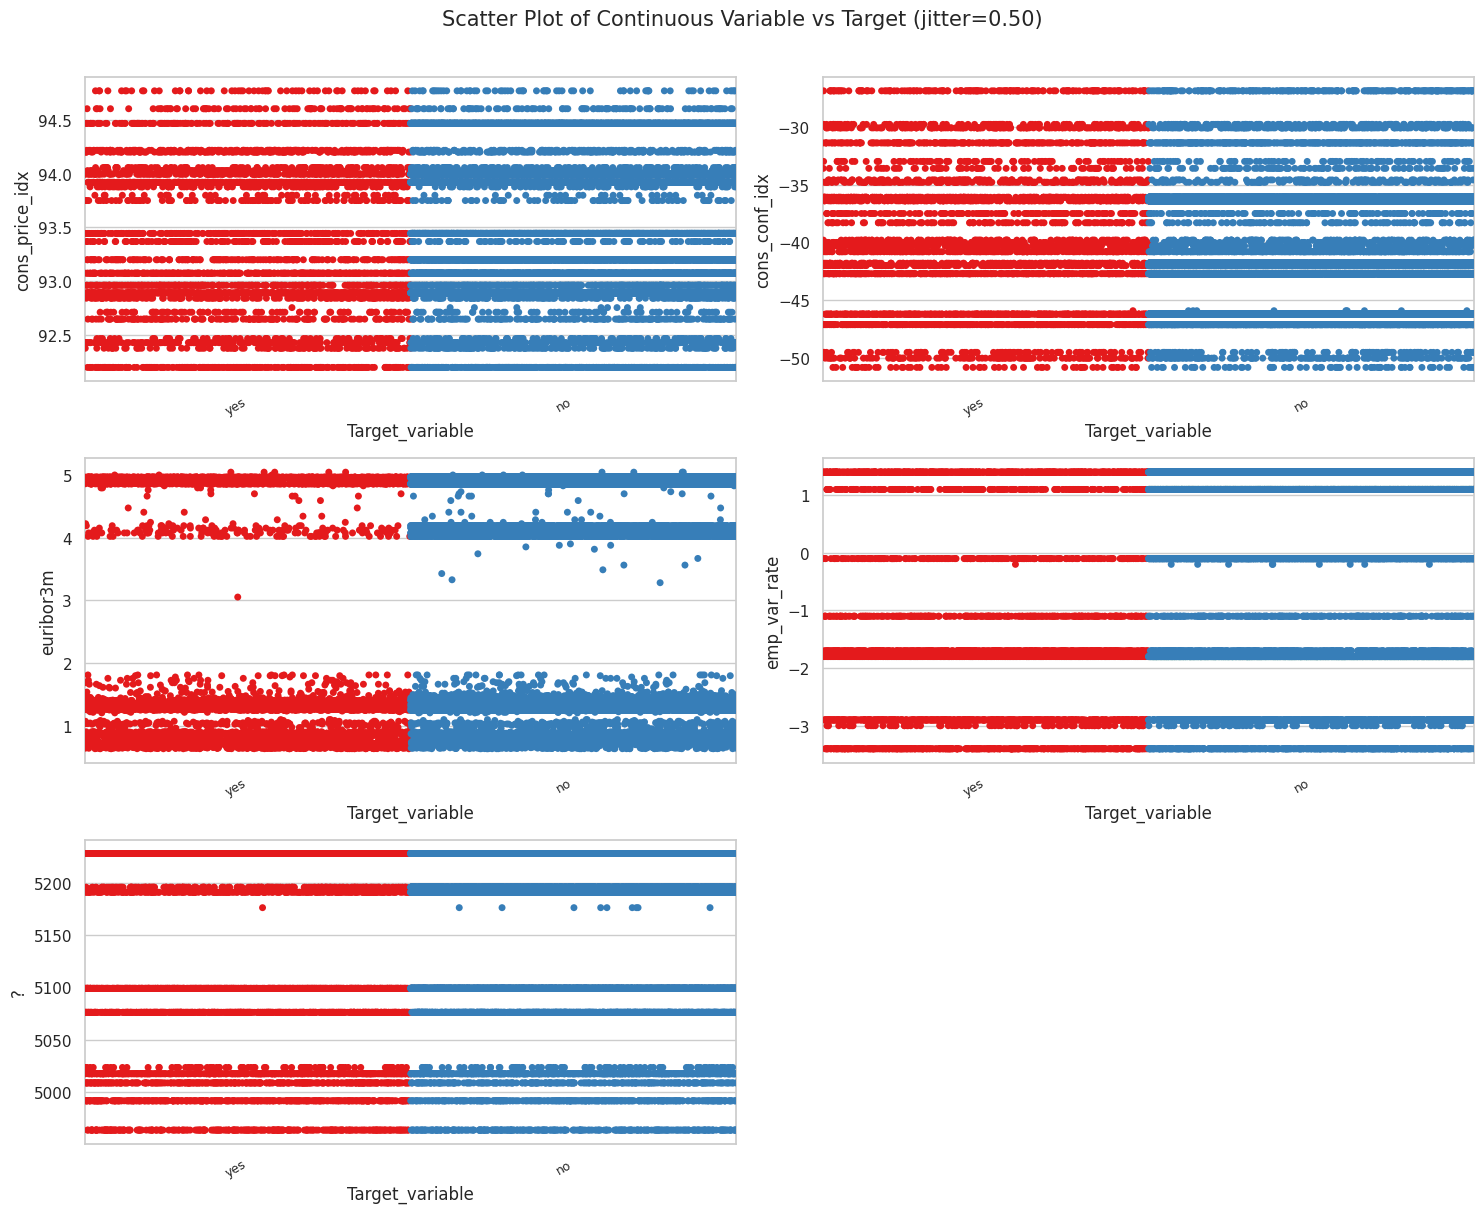

Total Number of Scatter Plots = 15


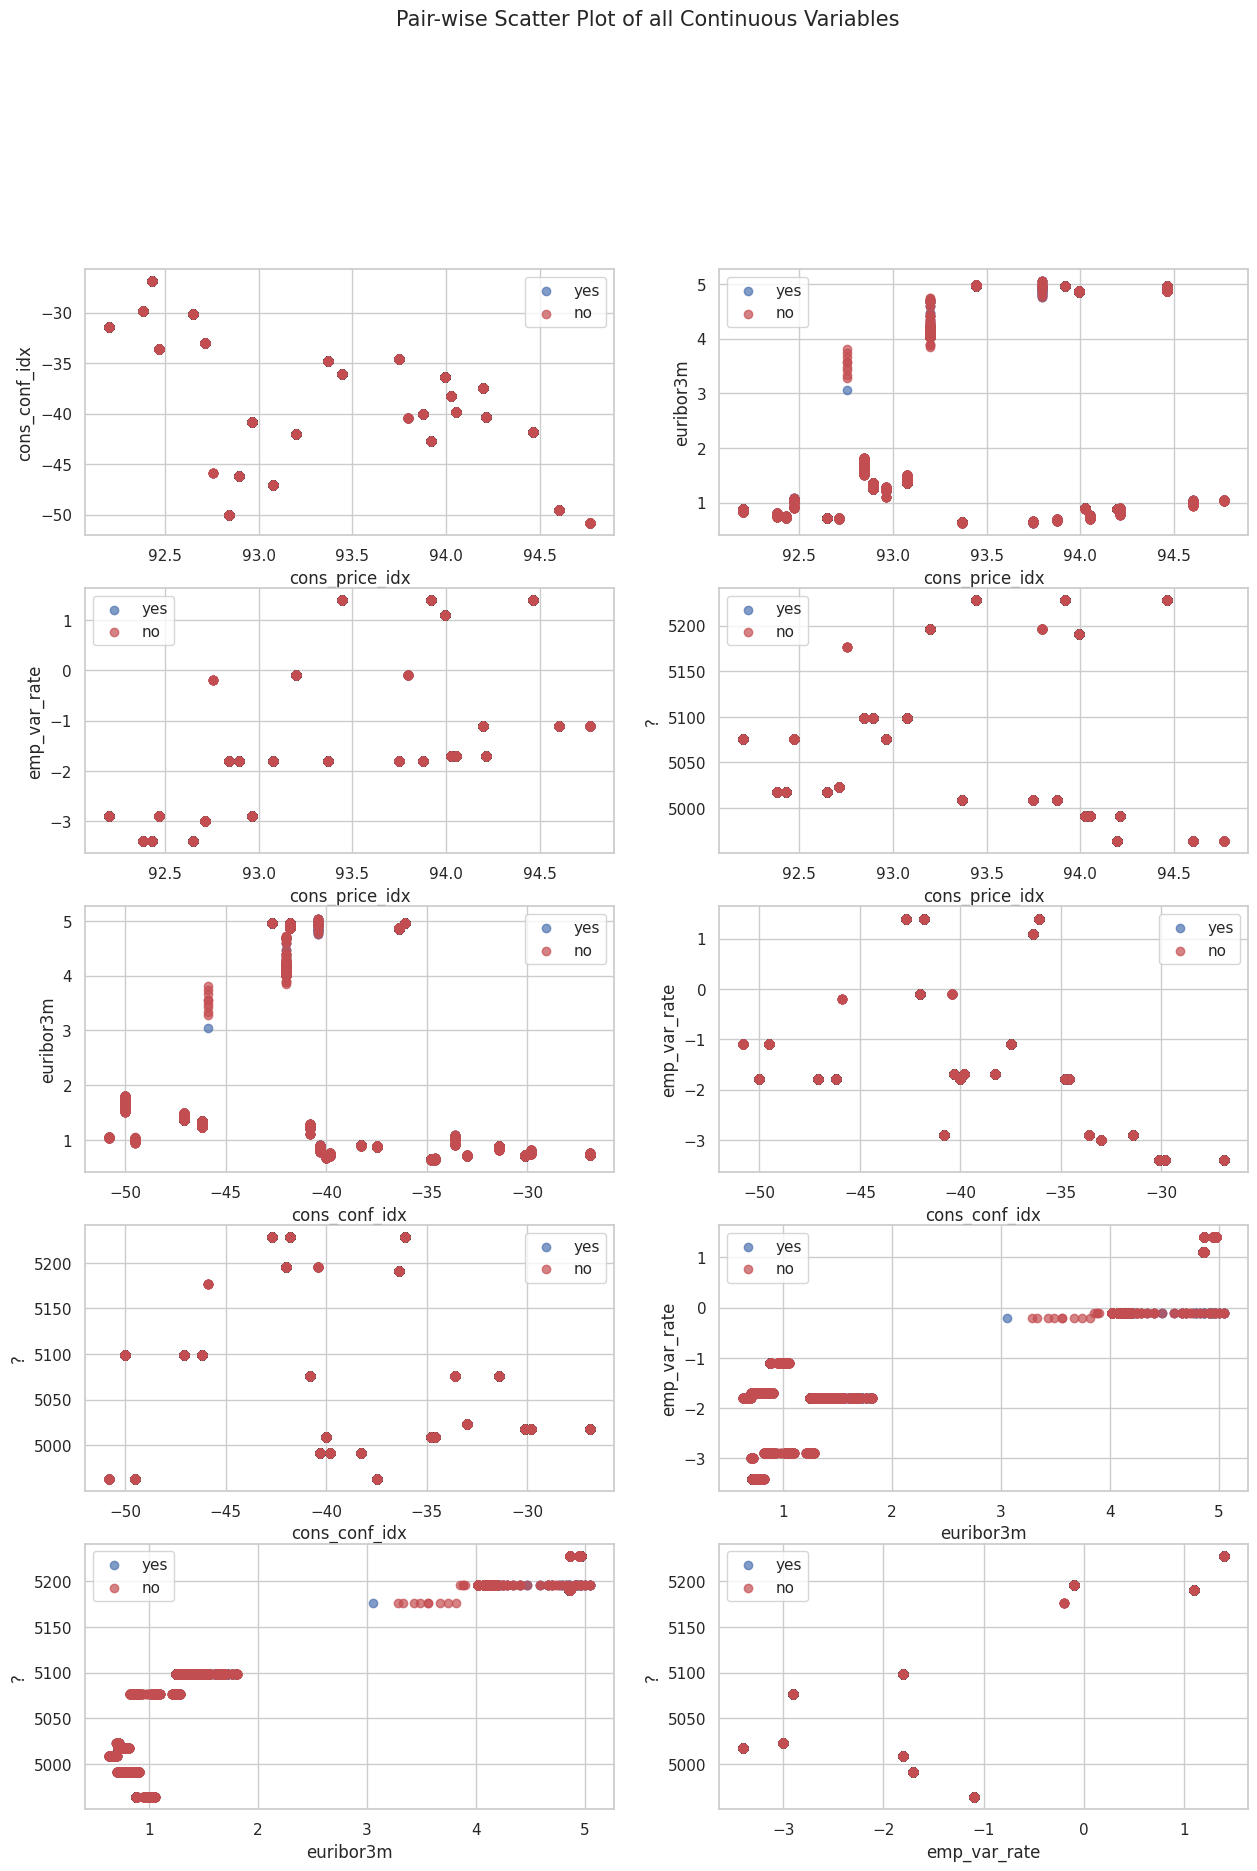

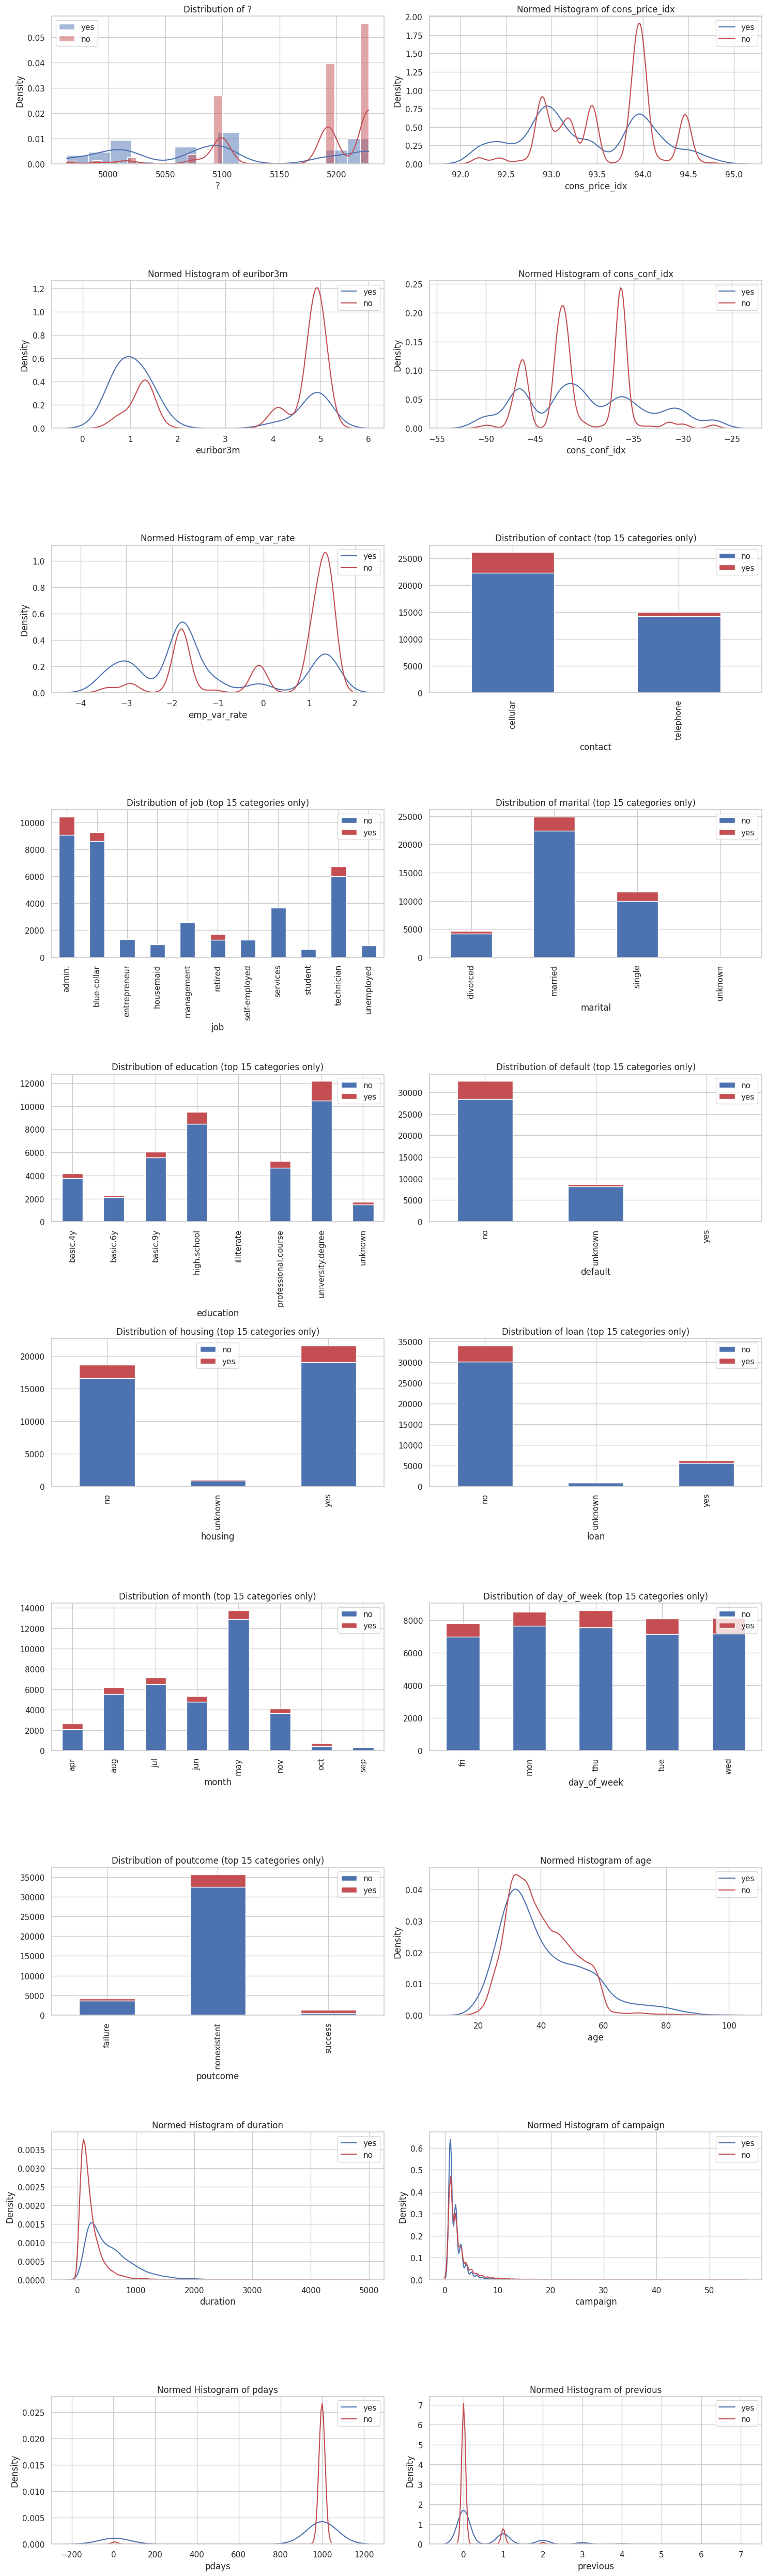

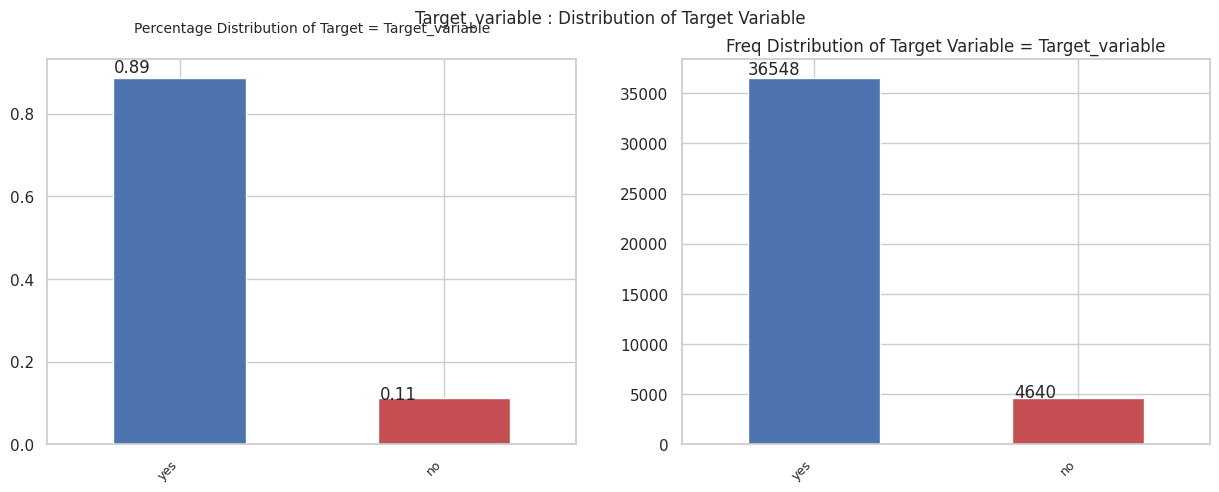

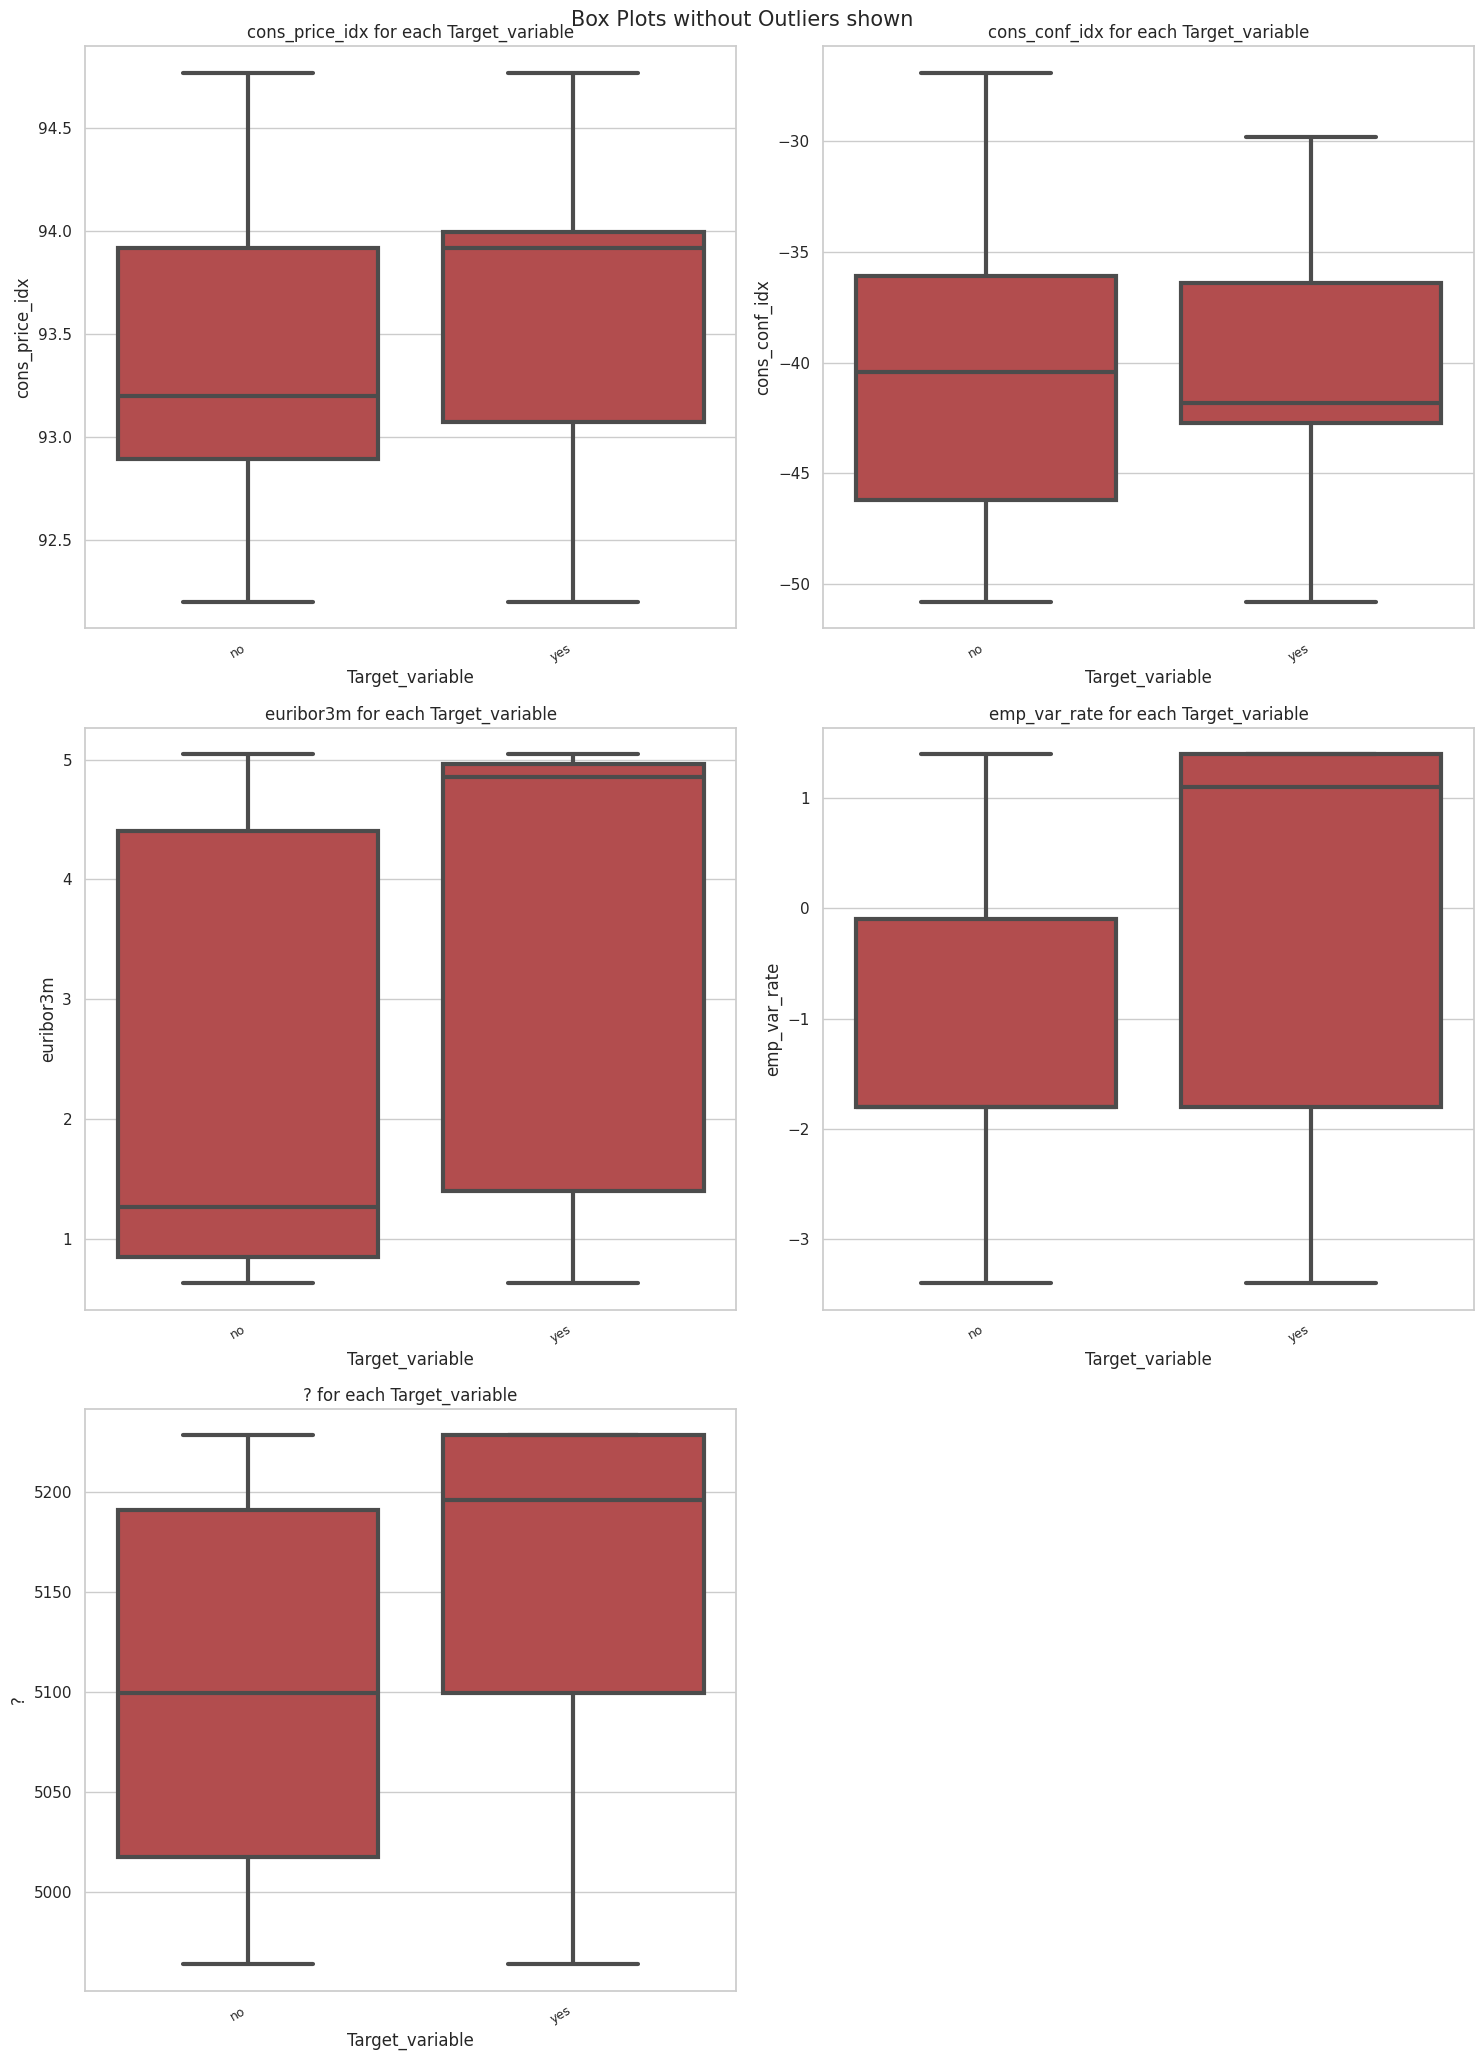

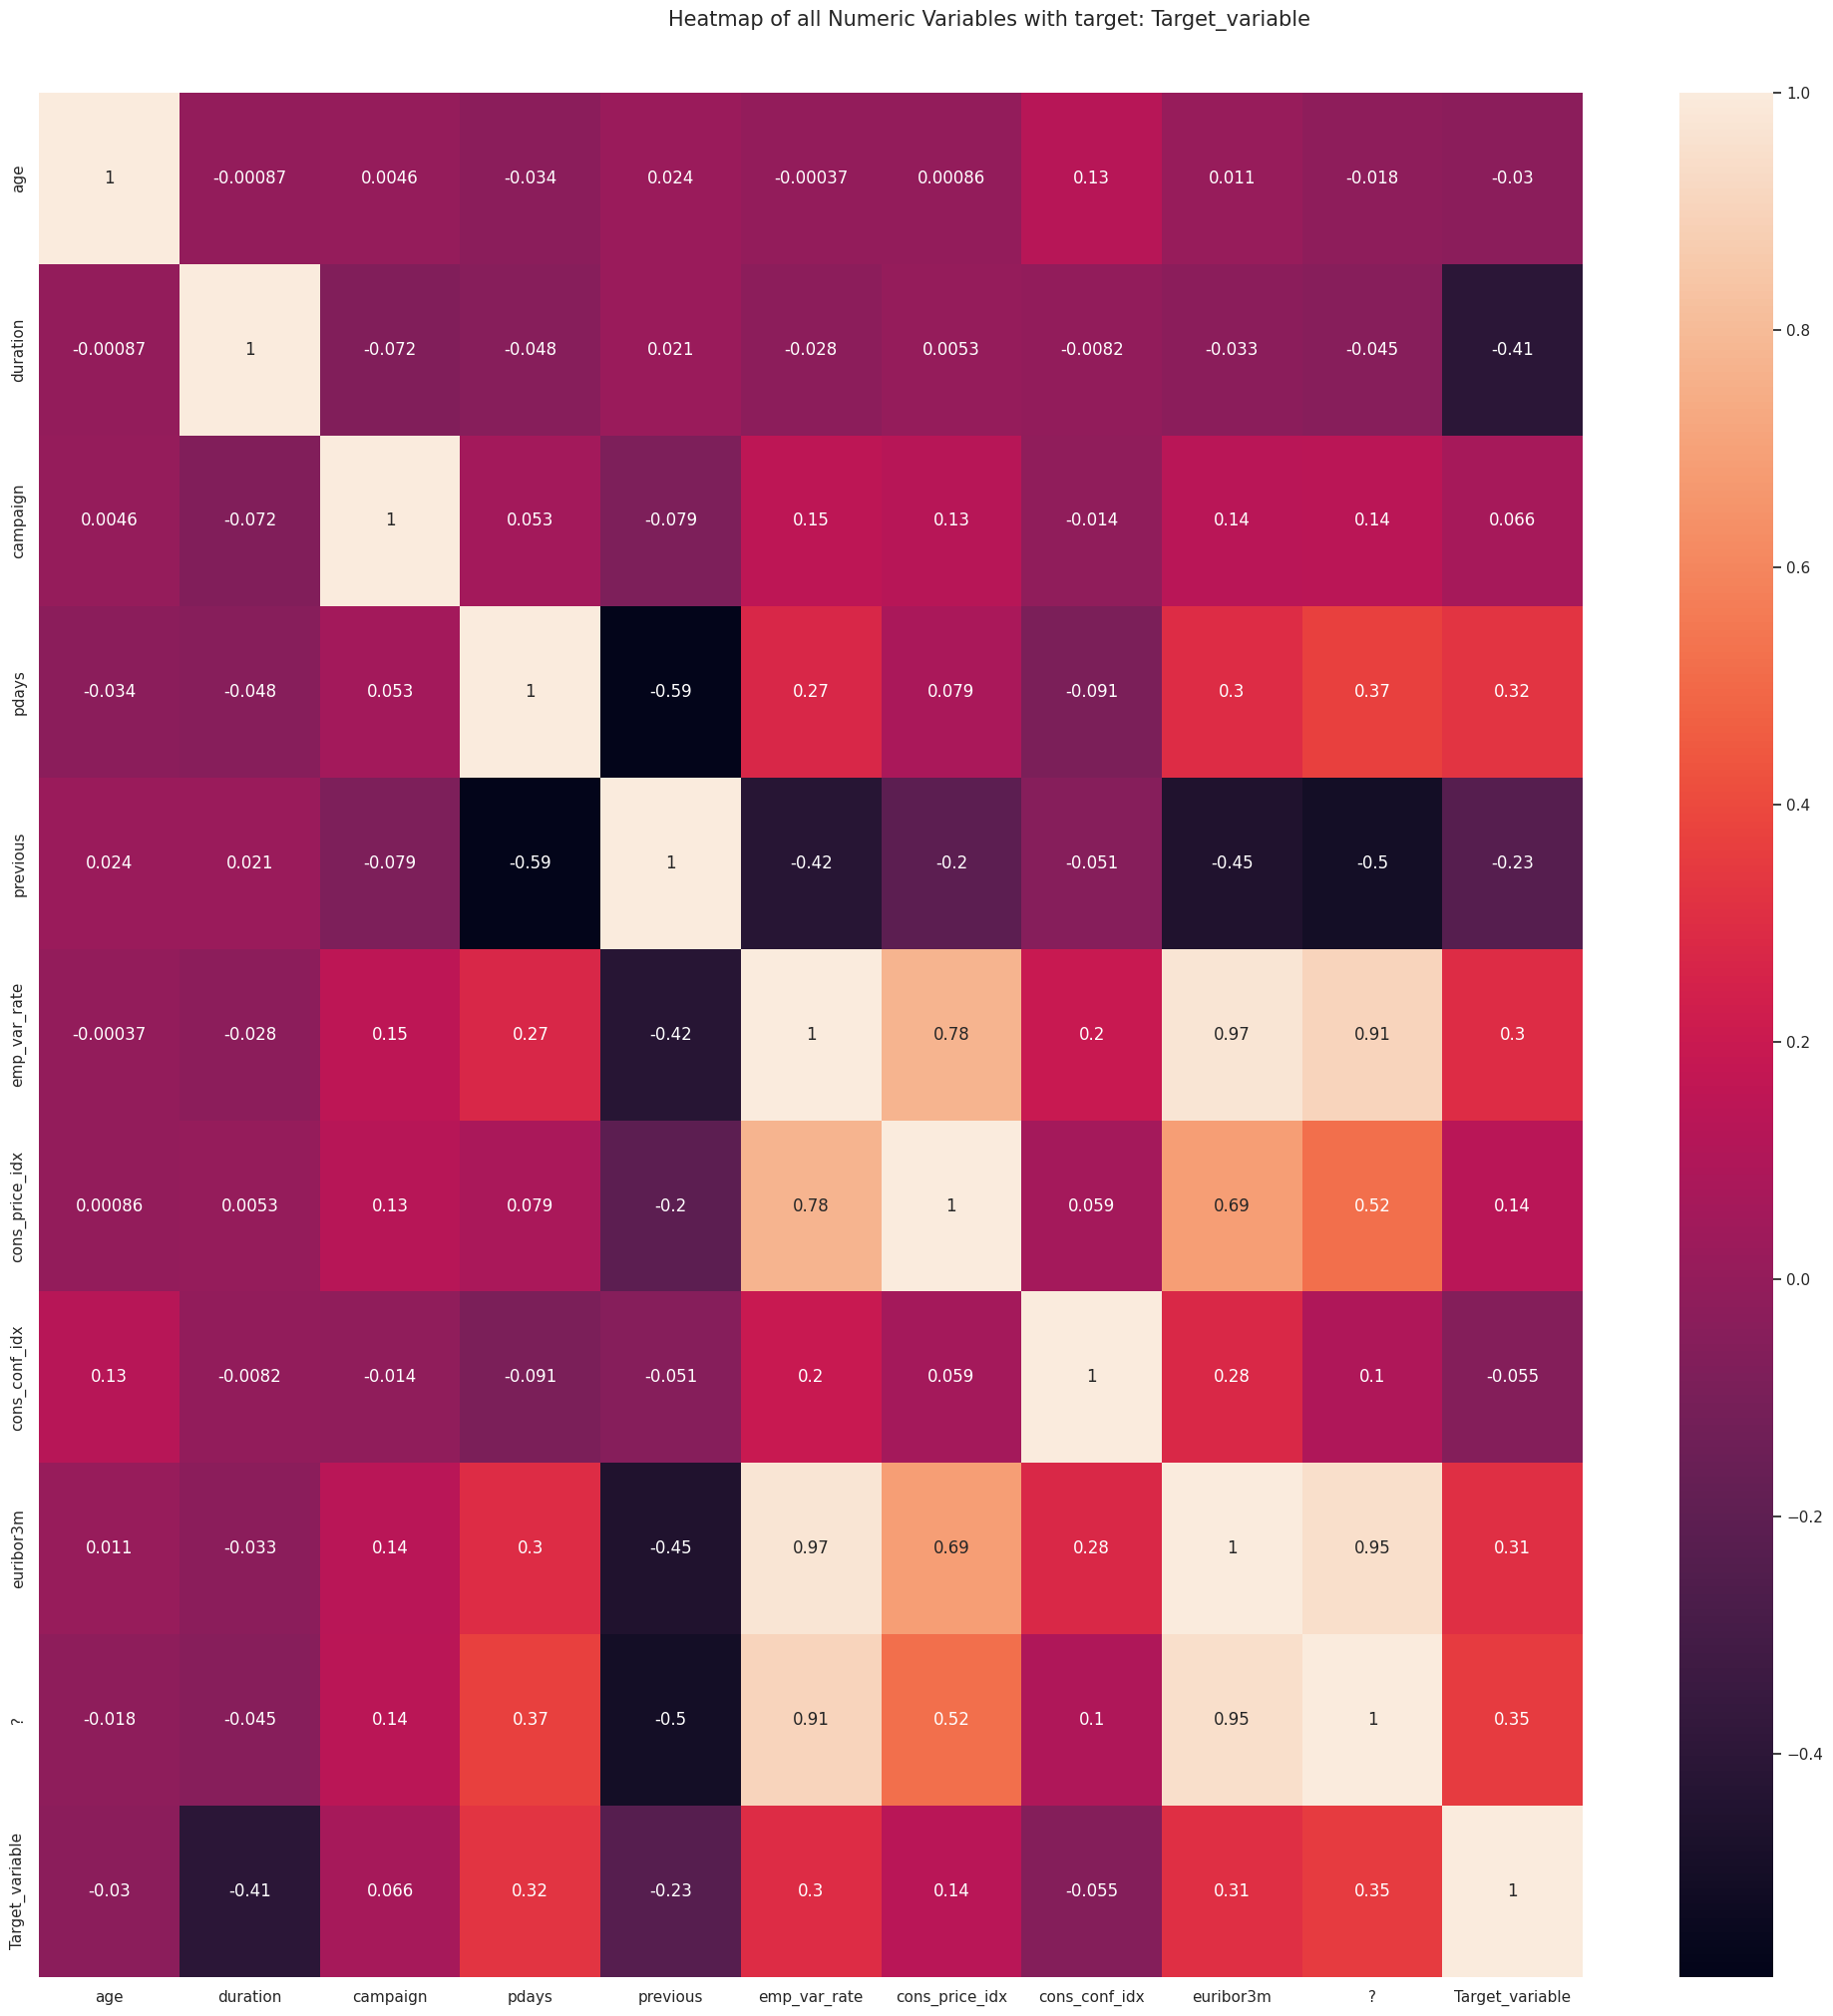

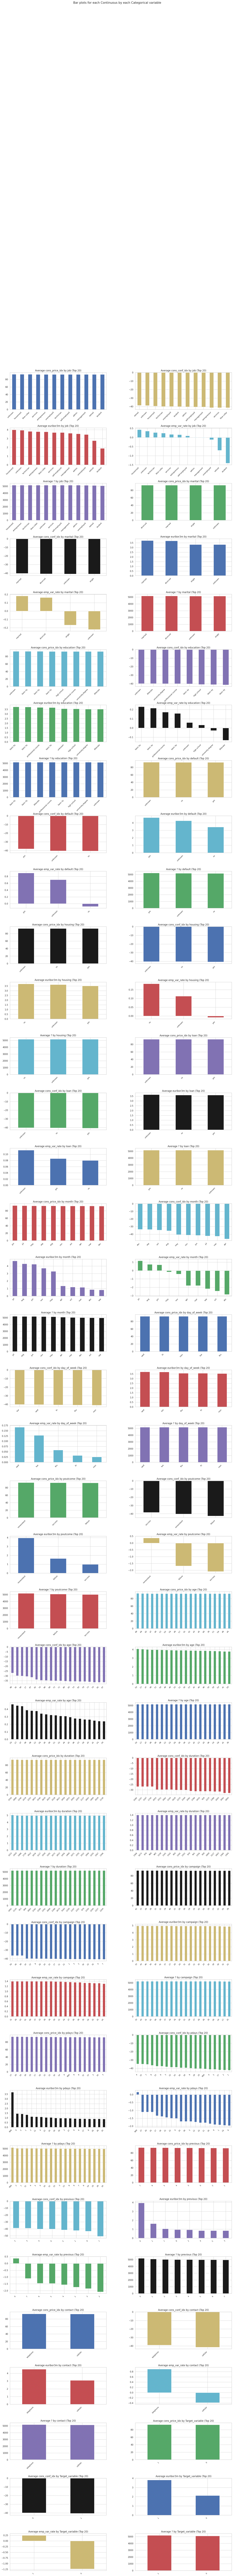

All Plots done
Time to run AutoViz = 78 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [10]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
report = AV.AutoViz(filename='',
                    sep=',',depVar='Target_variable',
                    dfte=data, header=0, verbose=1,
                    lowess=False,chart_format='png',
                    max_cols_analyzed=21,max_rows_analyzed=41188,
                    save_plot_dir=None)

In [ ]:
pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



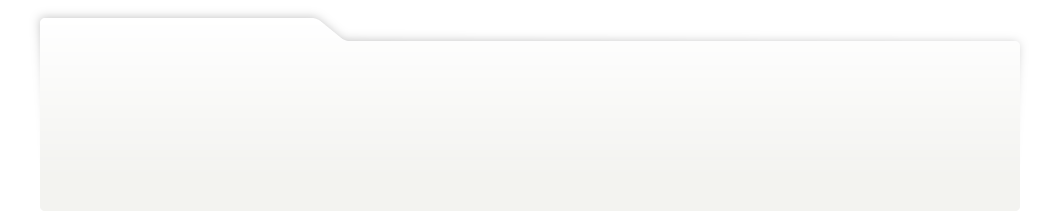
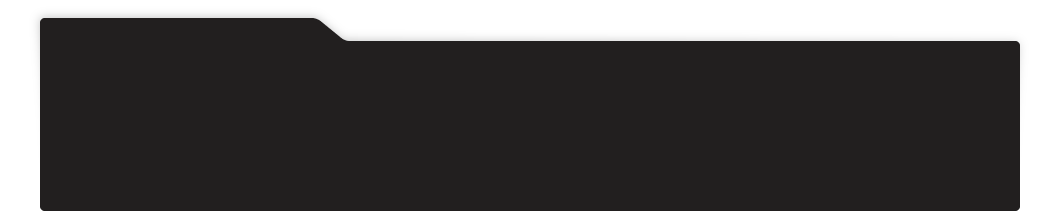
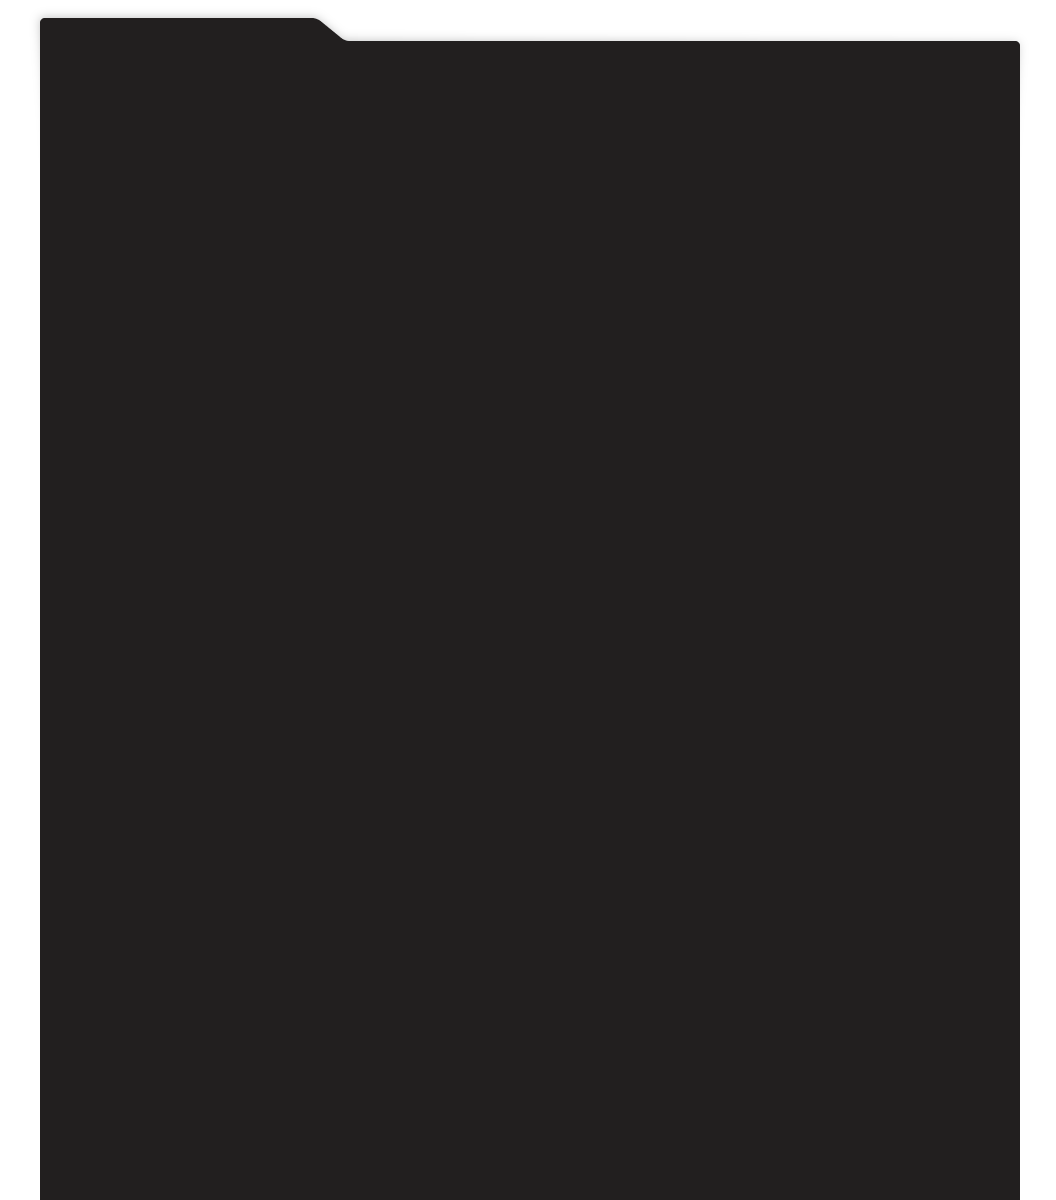
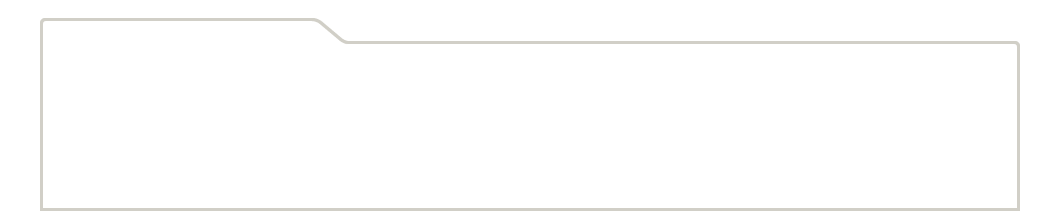
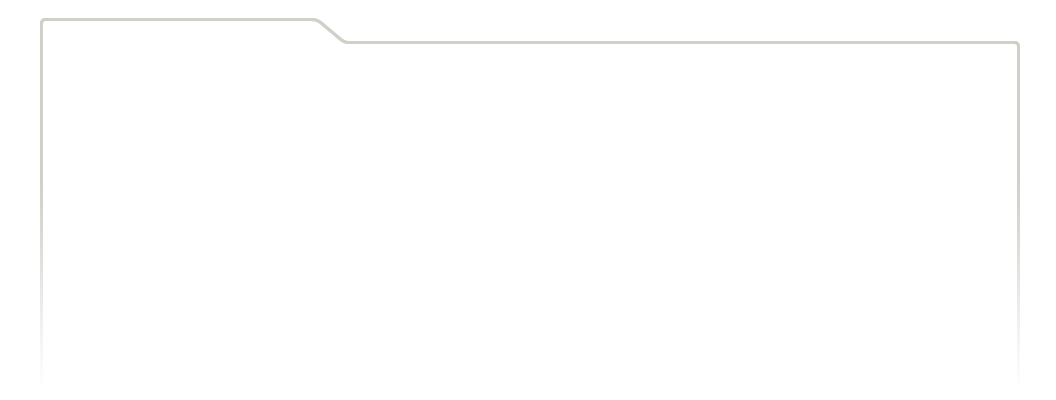
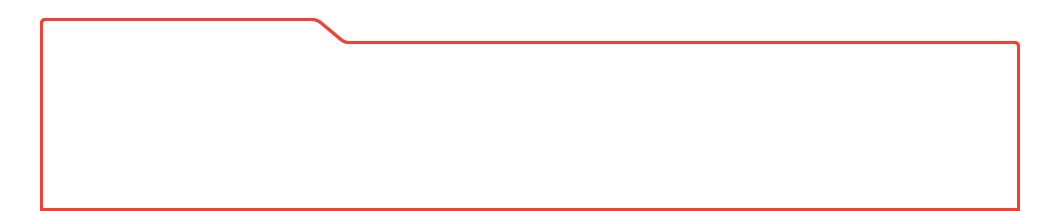
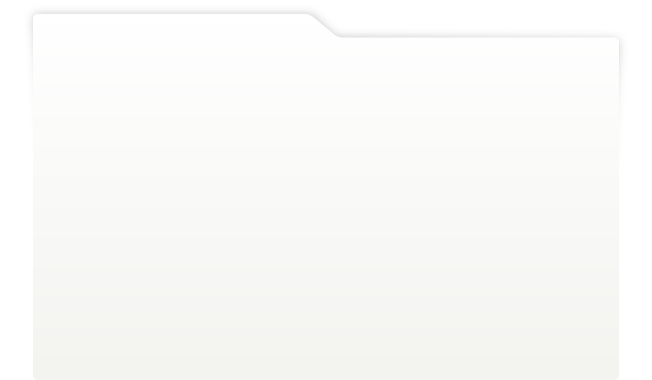
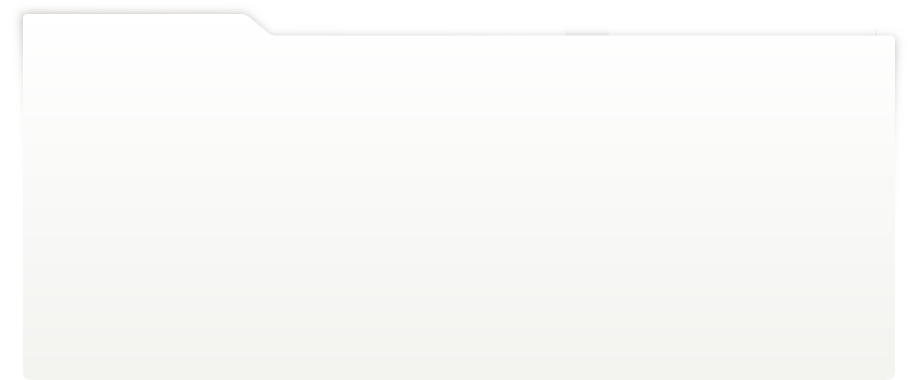
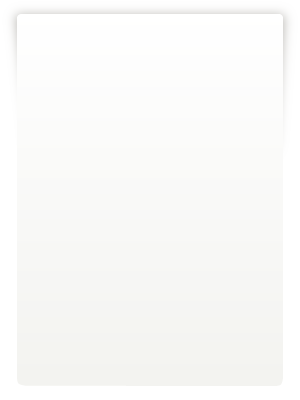
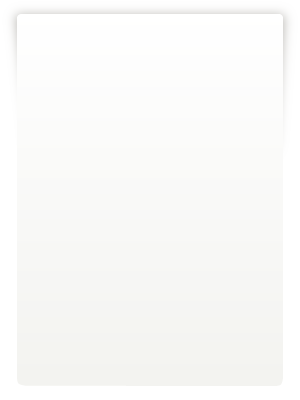
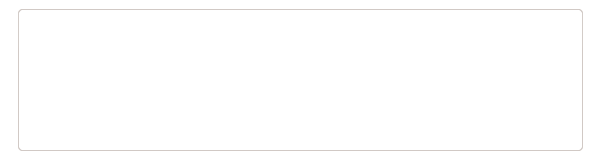
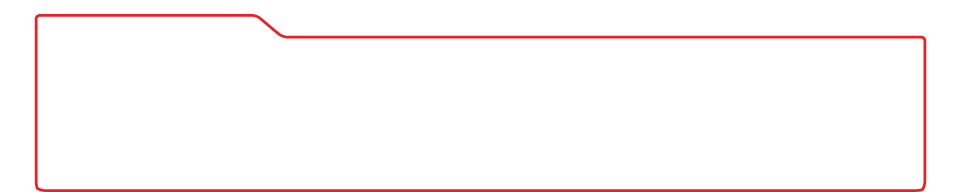
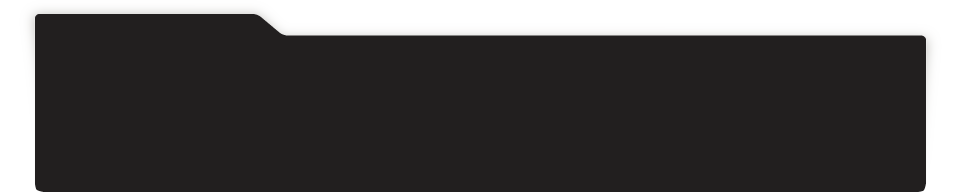
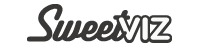
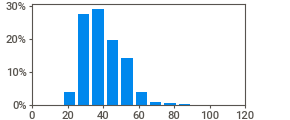
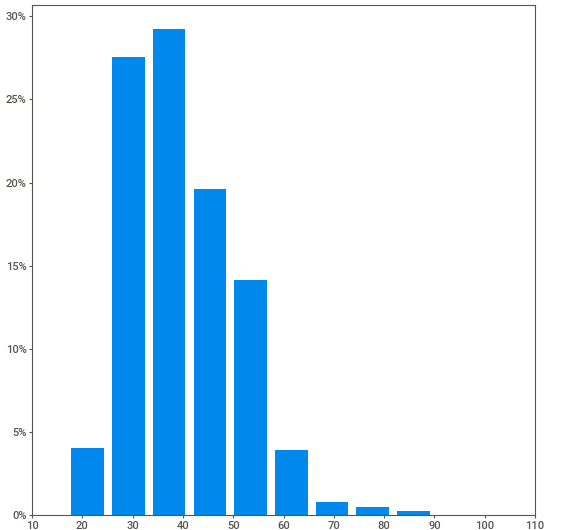
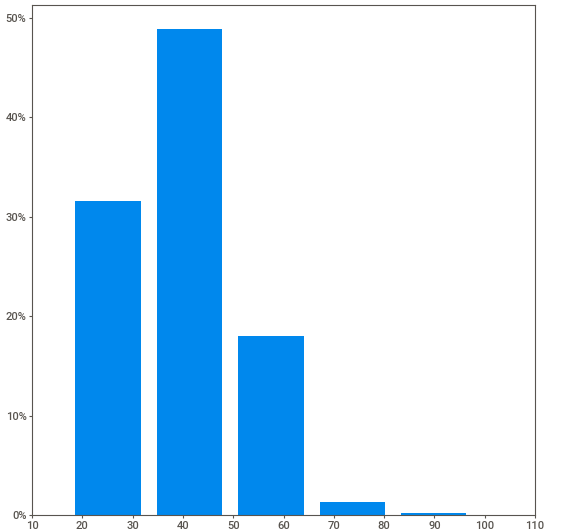
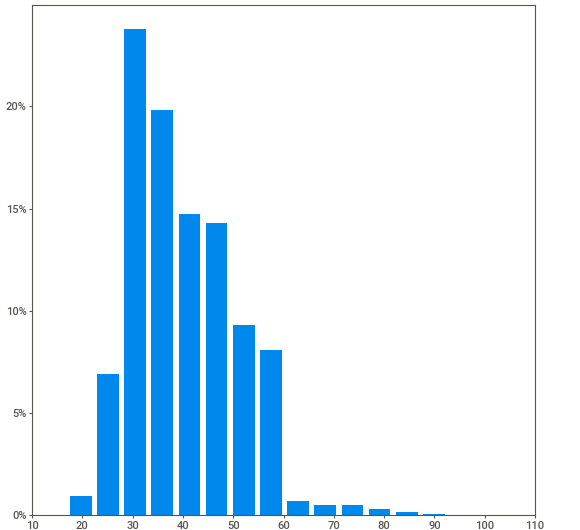
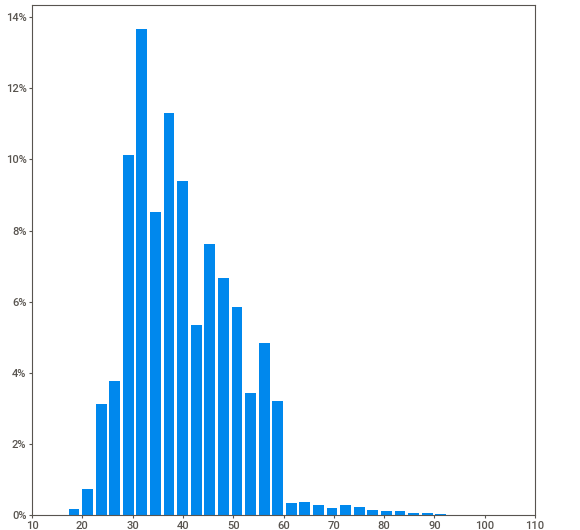
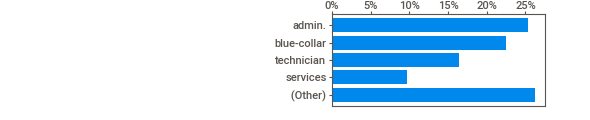
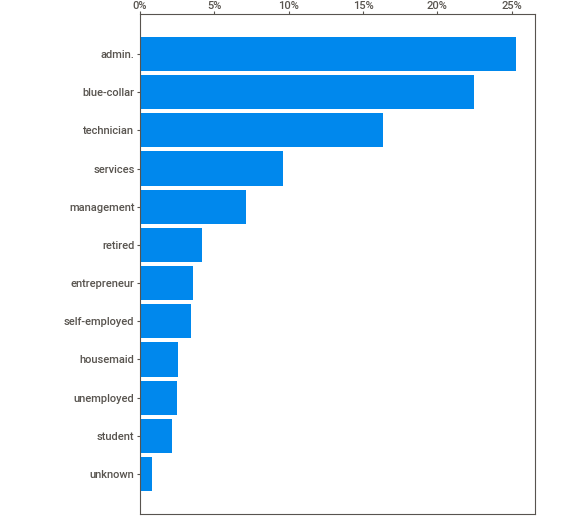
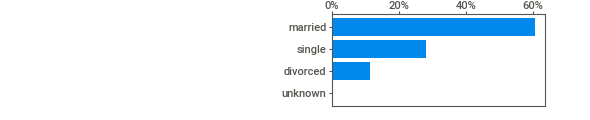
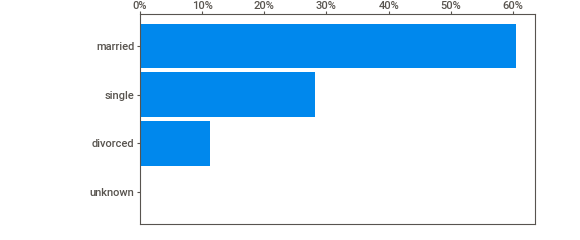
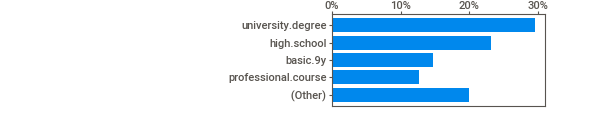
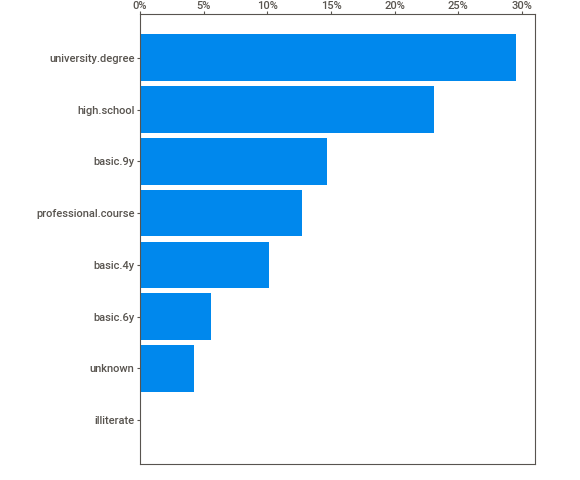
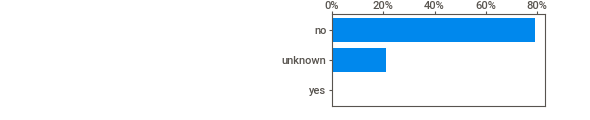
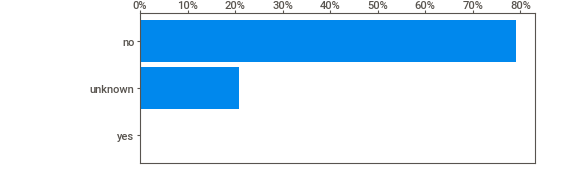
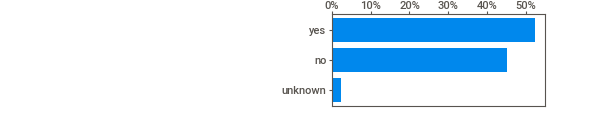
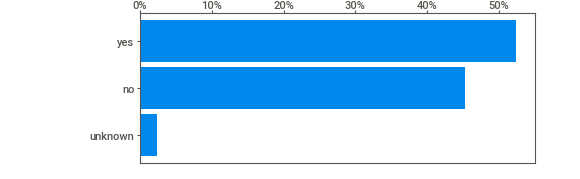
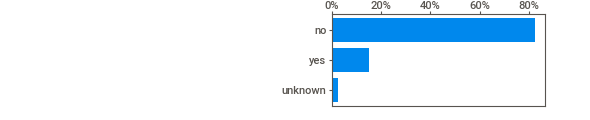
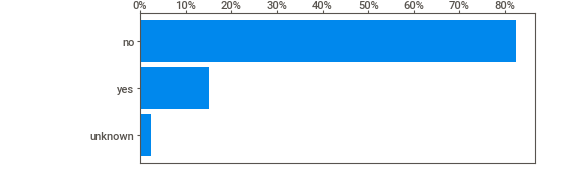
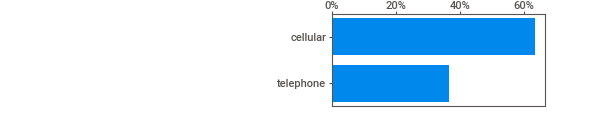
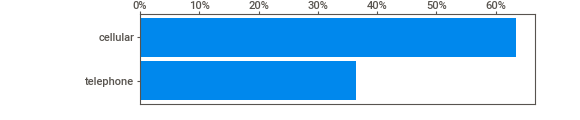
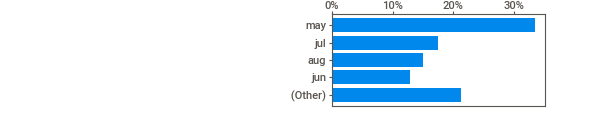
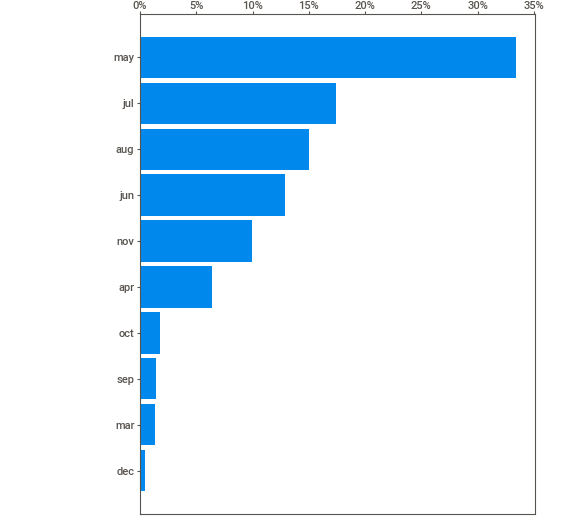
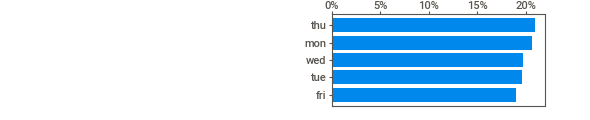
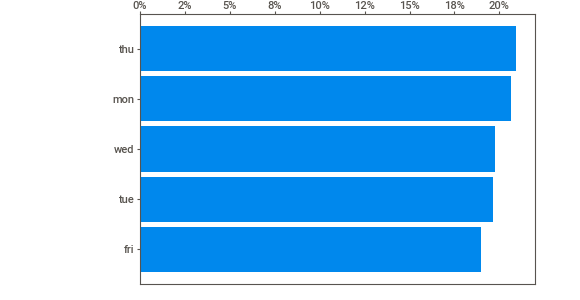
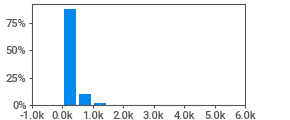
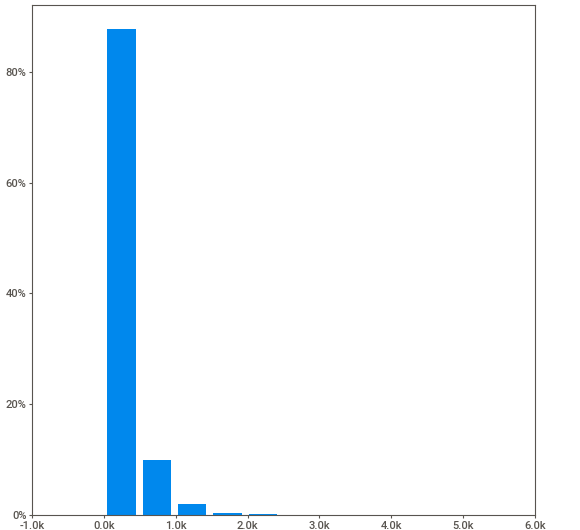
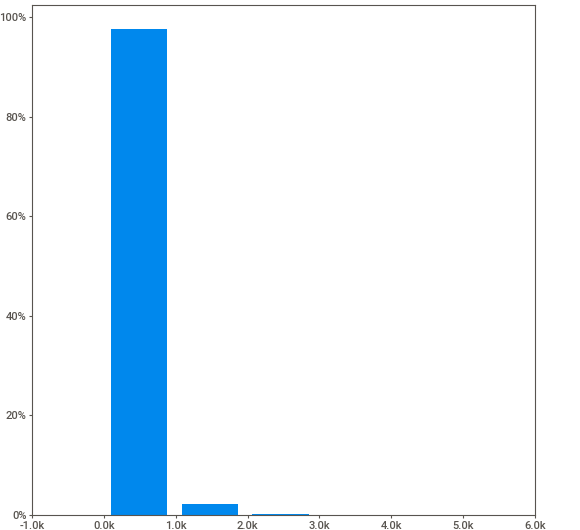
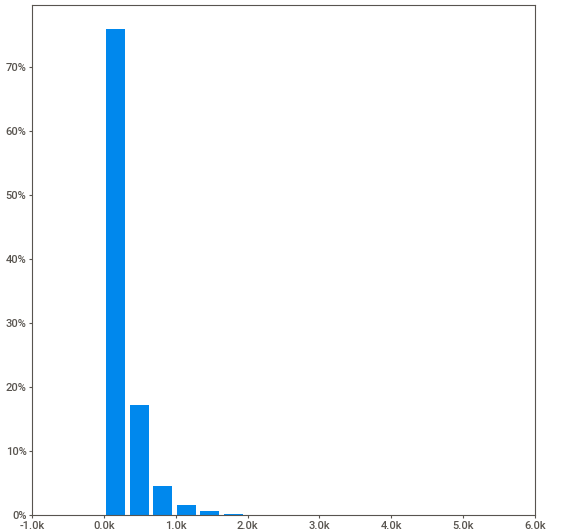
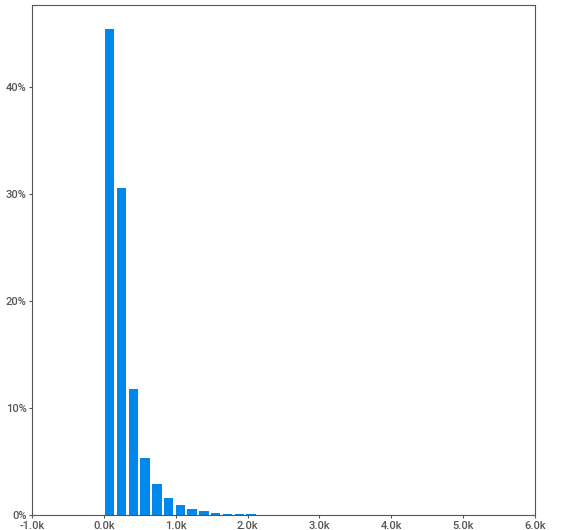
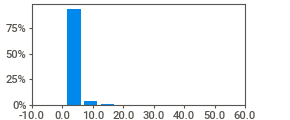
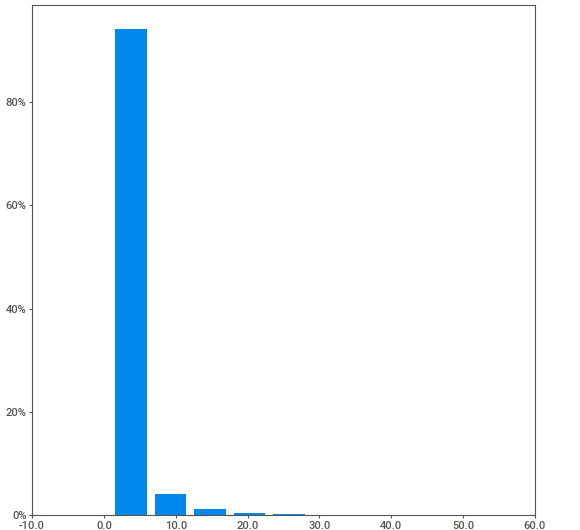
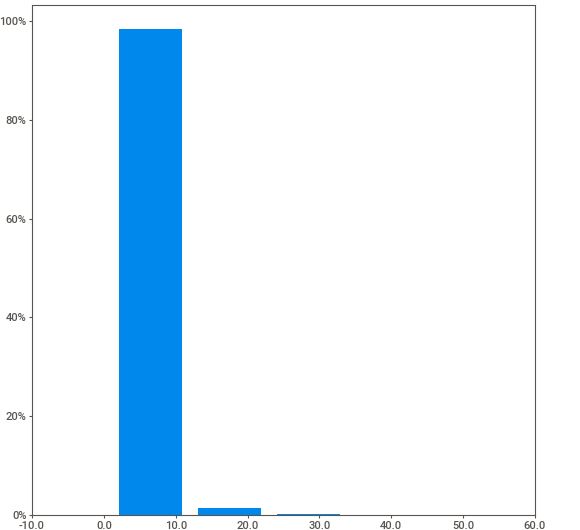
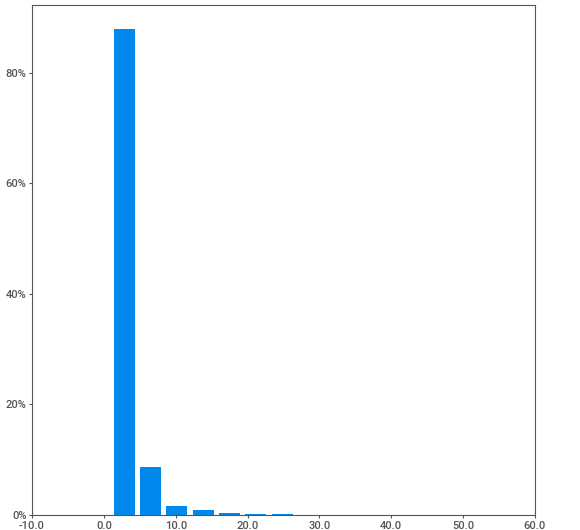
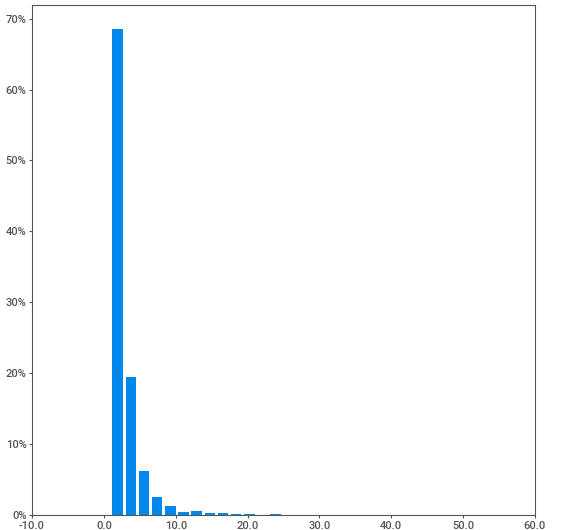
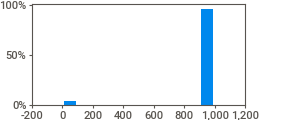
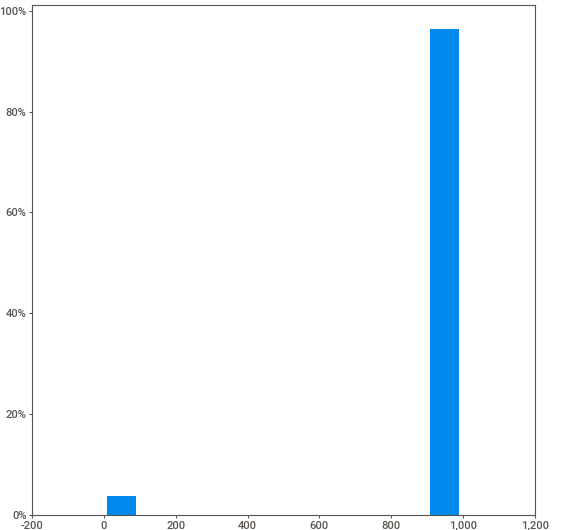
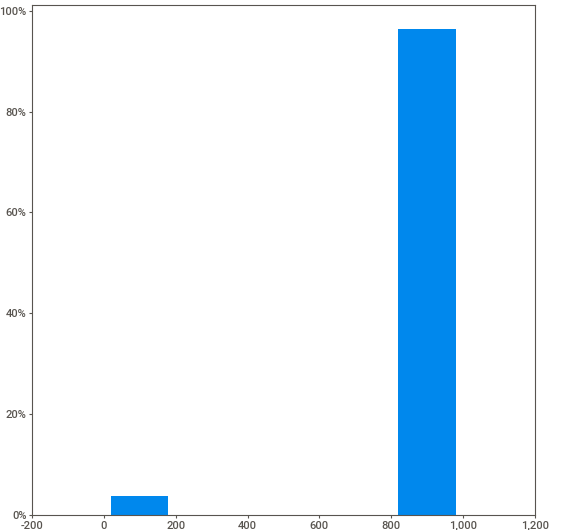
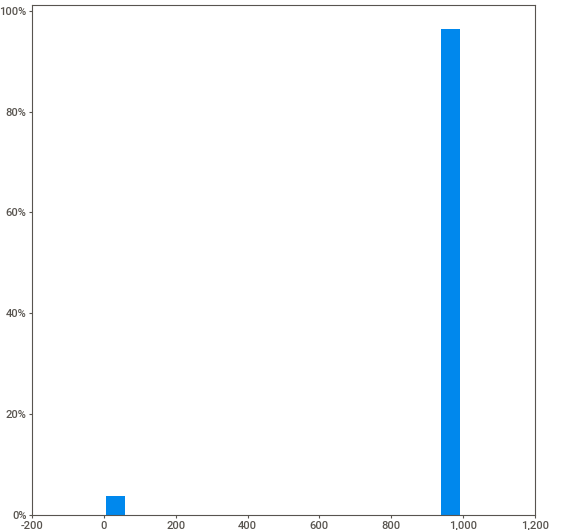
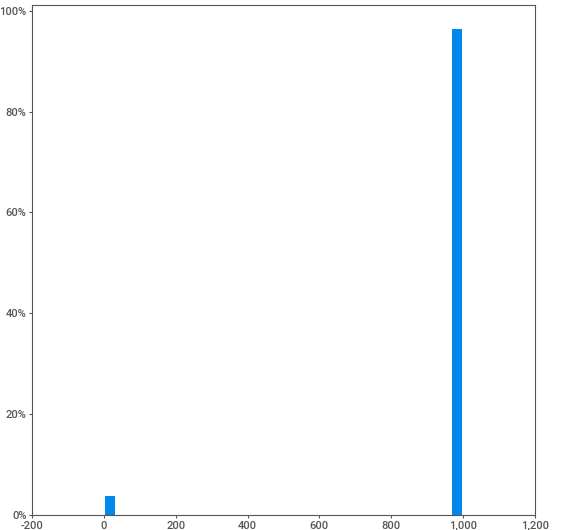
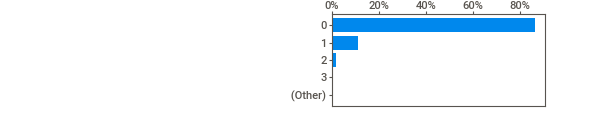
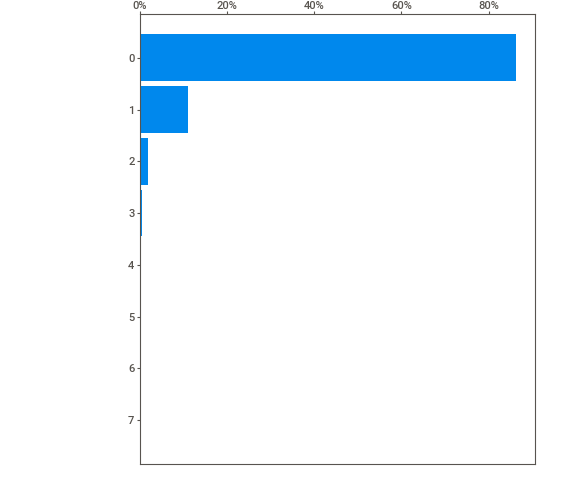
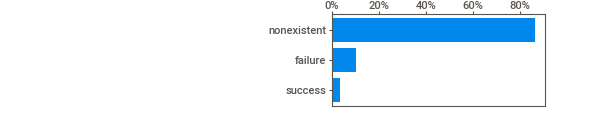
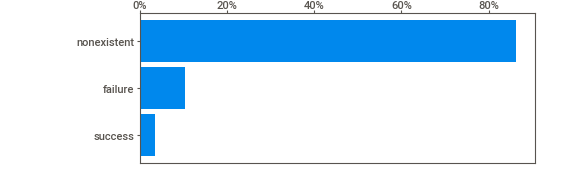
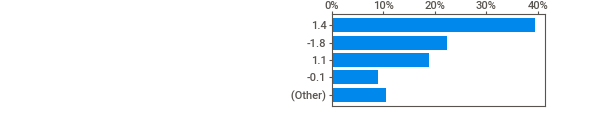
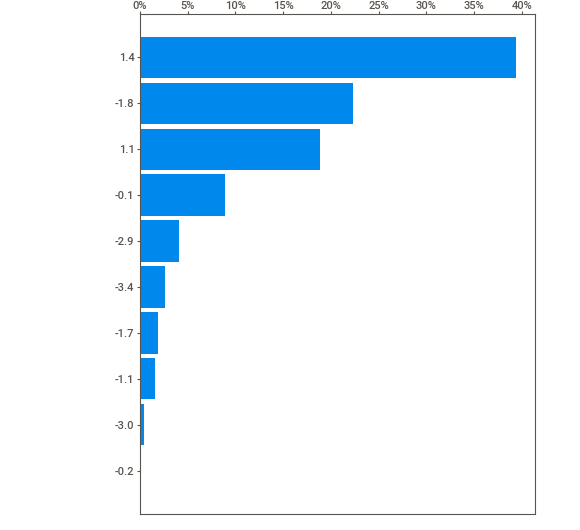
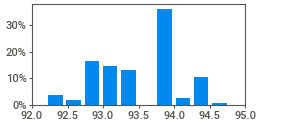
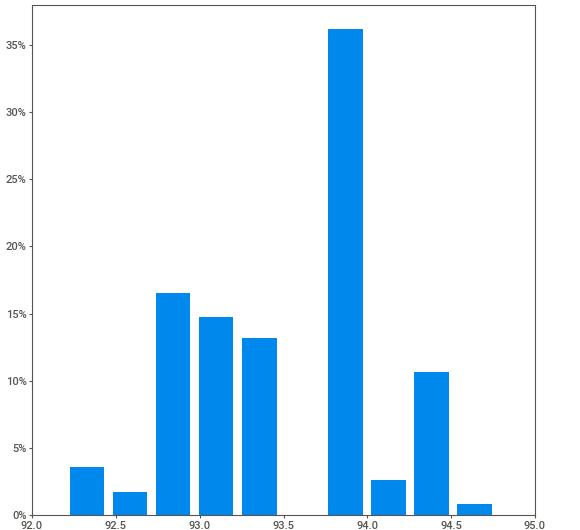
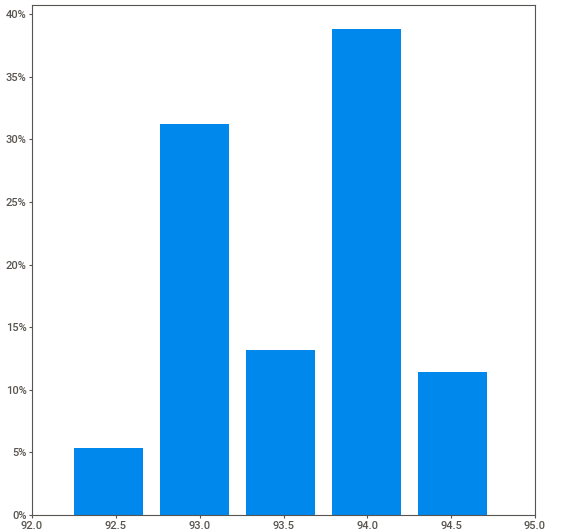
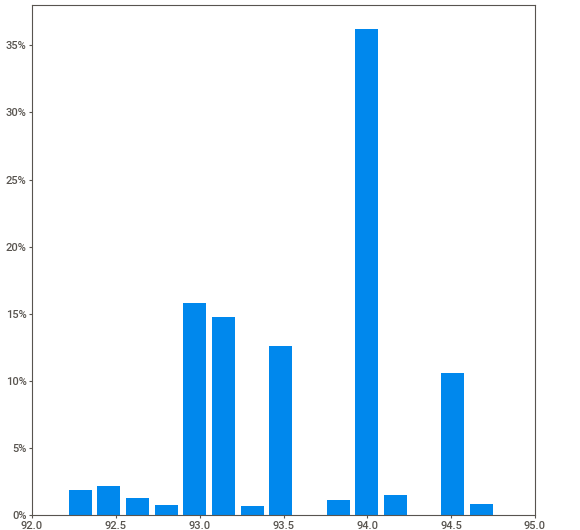
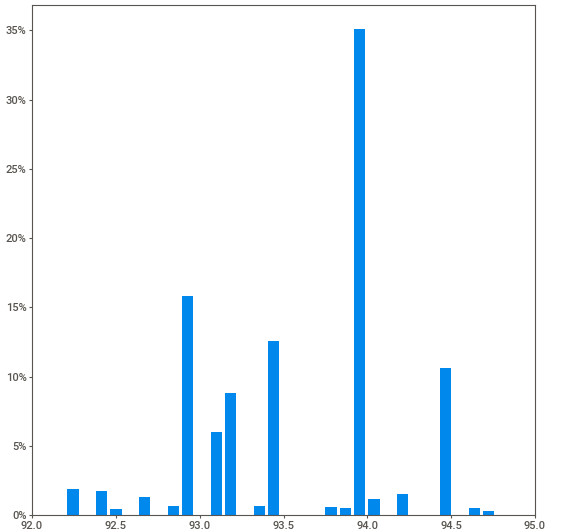
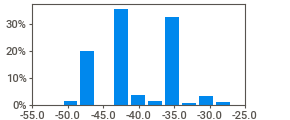
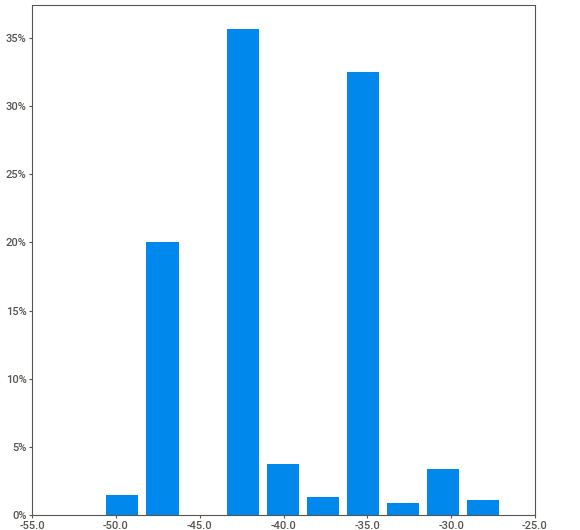
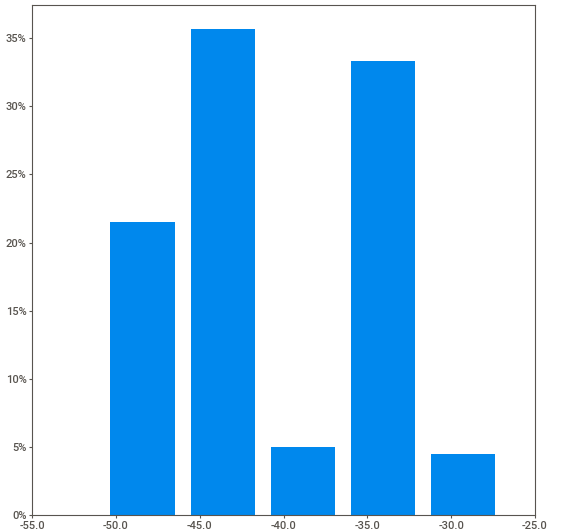
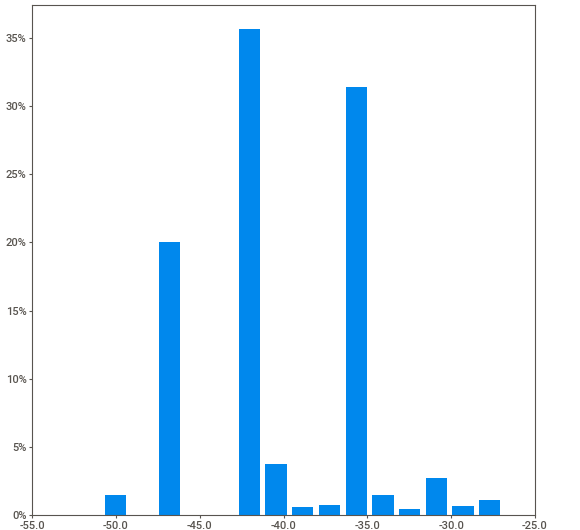
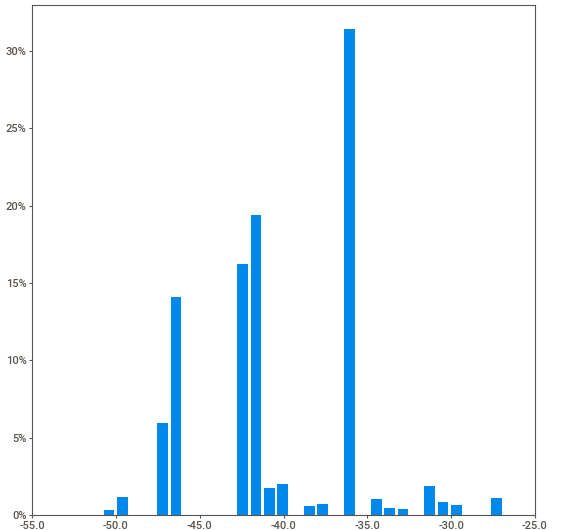
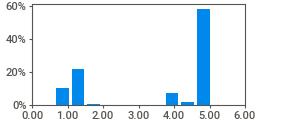
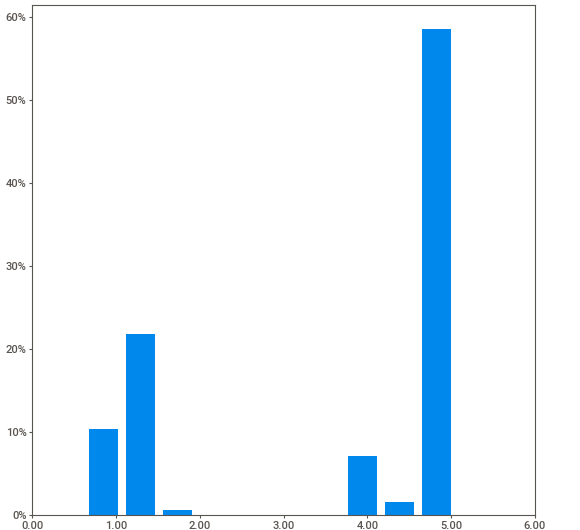
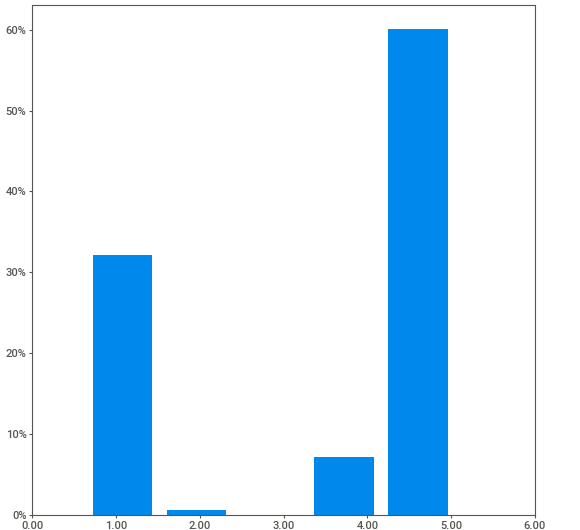
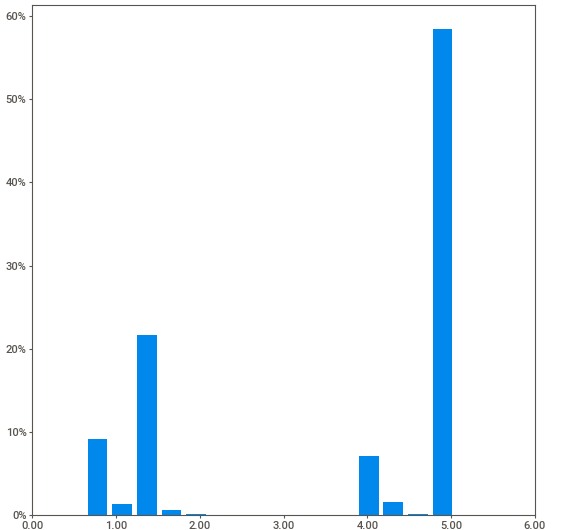
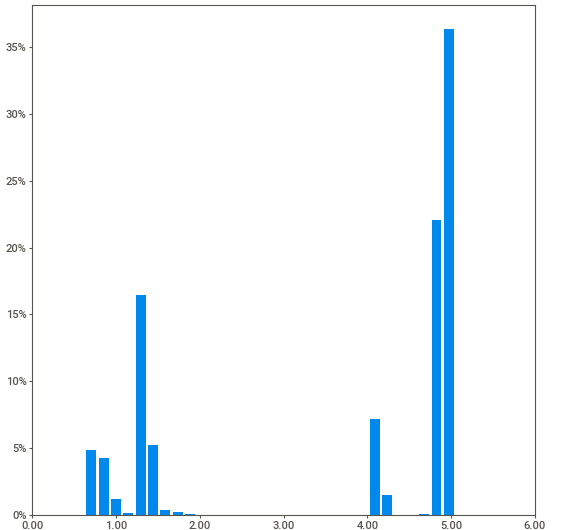
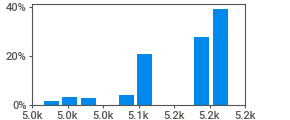
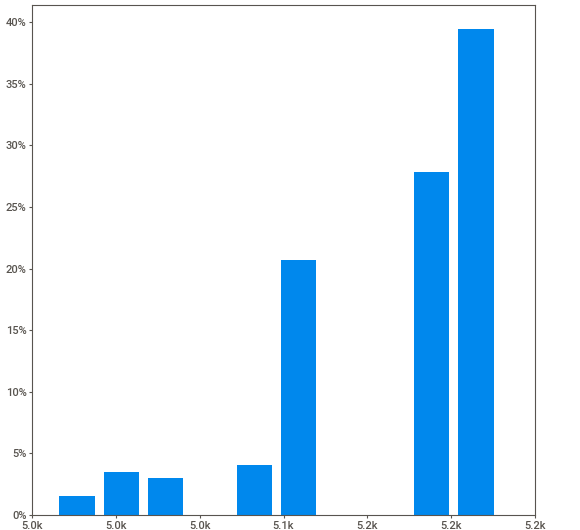
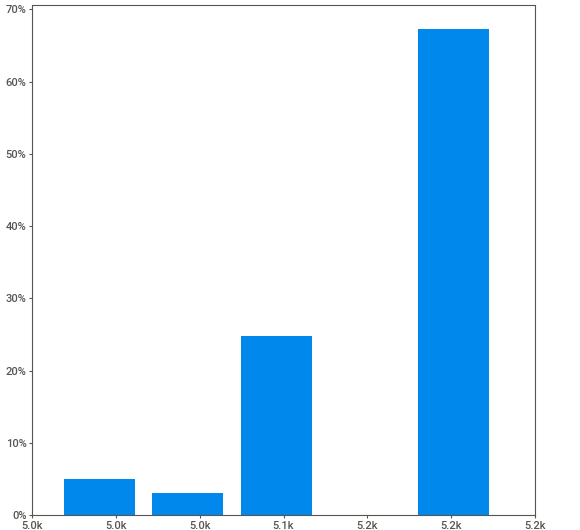
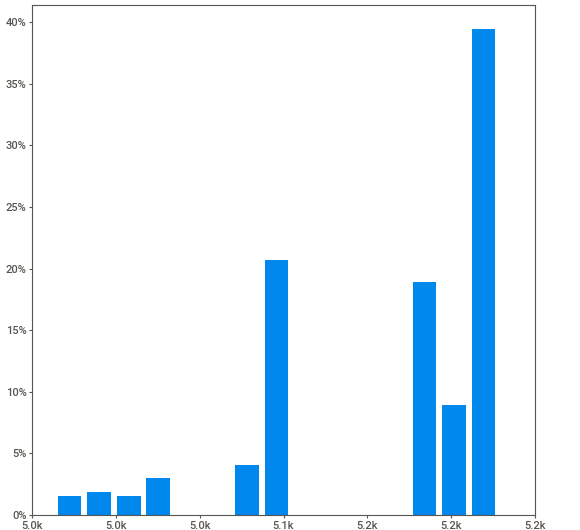
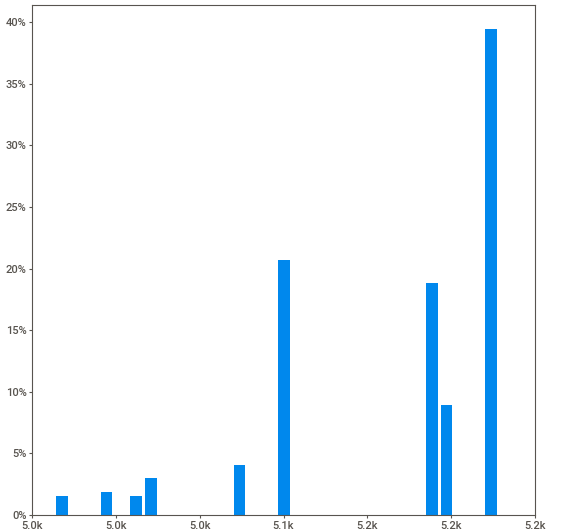
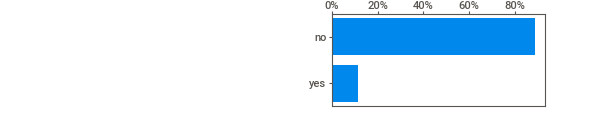
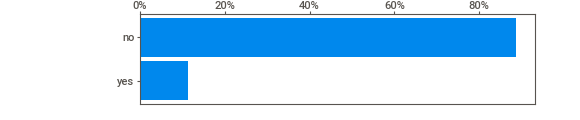
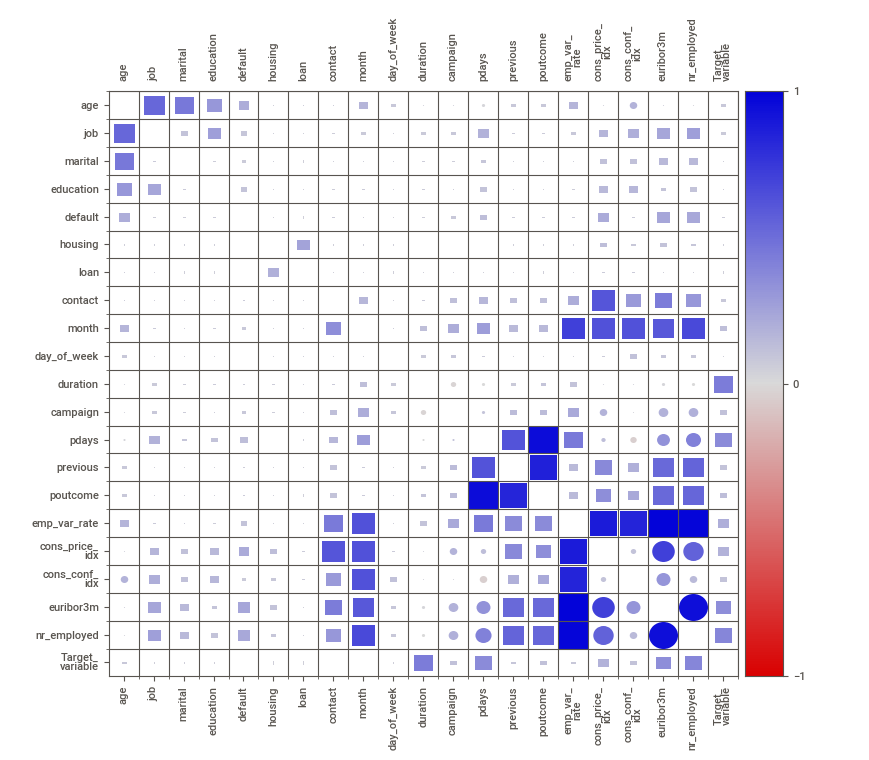
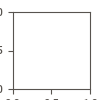

In [ ]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()
report.show_notebook()

**INSIGHTS**

*   _**Univariate analysis** is essential because it **Unveils patterns and trends** within individual variables and lays the **groundwork** for further analysis by **highlighting potential relationships** between the variable._

*   _We can leverage the two powerful tools for data exploration: **AutoViz** and **Sweetviz**._

*   _**AutoViz** excels at generating **diverse visualizations** with minimal configuration. It efficiently handles large datasets, making it ideal for initial exploratory analysis._

*   _**Sweetviz** delves deeper, providing comprehensive reports that include **visualizations, statistics**, and **comparisons** between training and testing datasets_

## **Bivariate analysis**

In [10]:
categorical_columns = [col for col,
                       dtype in data.dtypes.items()
                       if str(dtype) in ('object','categorical')]
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'Target_variable']

In [11]:
numerical_columns = [col for col,
                     dtype in data.dtypes.items()
                     if np.issubdtype(dtype, np.number)]
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [12]:
# Categorical columns
data1 = data[['job','marital','education','default','housing','loan','contact',
              'month','day_of_week','poutcome','Target_variable']]

# Numerical columns
data2 = data[['age','duration','campaign','pdays','previous','emp_var_rate',
              'cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]

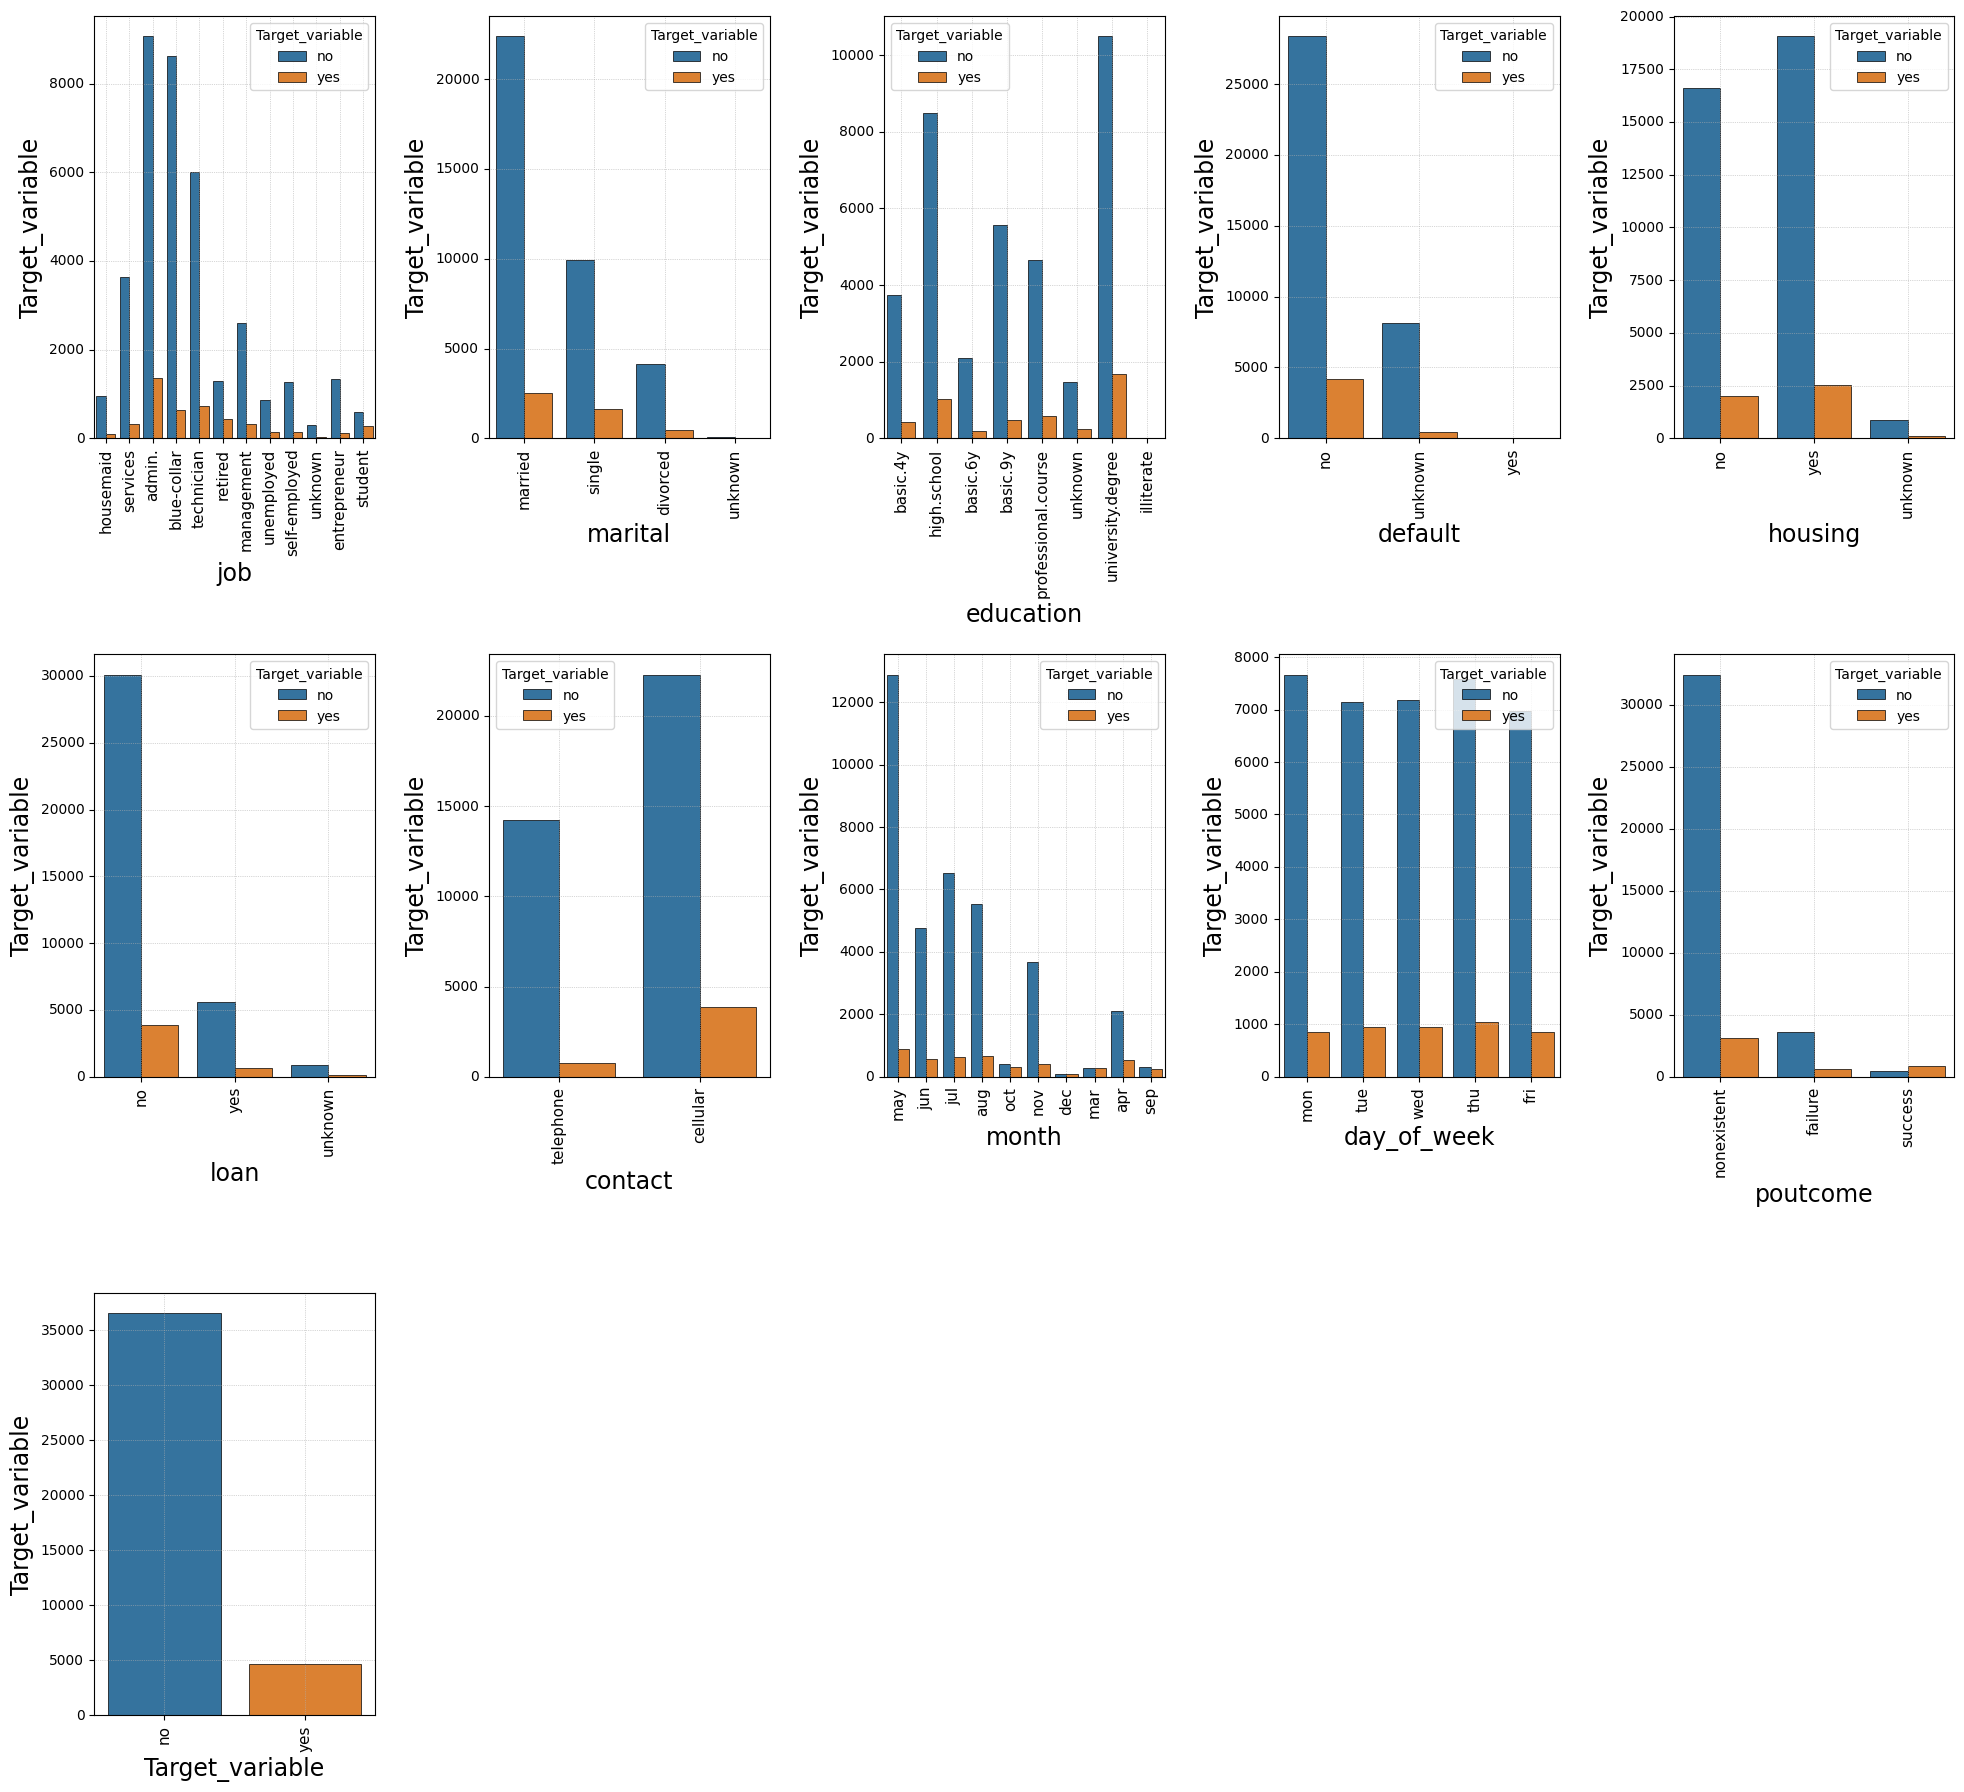

In [13]:
plt.figure(figsize=(20, 24), facecolor='white')
plotnumber = 1
for column in data1:
  if plotnumber<=20:
    ax = plt.subplot(4,5,plotnumber)
    bar_width=0.7
    ax = plt.gca()
    for line in ax.lines:
      line.set_linewidth(0.6)
    sns.countplot(x=data1[column],hue=data['Target_variable'],ax=ax,saturation=0.7,
                  linewidth=0.5,edgecolor='#000000')
    plt.xlabel(column, fontsize=17, ha='center')
    plt.ylabel('Target_variable', fontsize=17)
    plt.subplots_adjust(left=0.3, right=0.7, bottom=0.3, top=0.7, wspace=0.3, hspace=0.5)
    plt.xticks(rotation=90, ha='center', fontsize=11)
    plt.yticks(verticalalignment='center')
    plt.grid(True, linestyle=':', linewidth=0.5)
    plotnumber +=1
plt.tight_layout(pad=2)
plt.show()

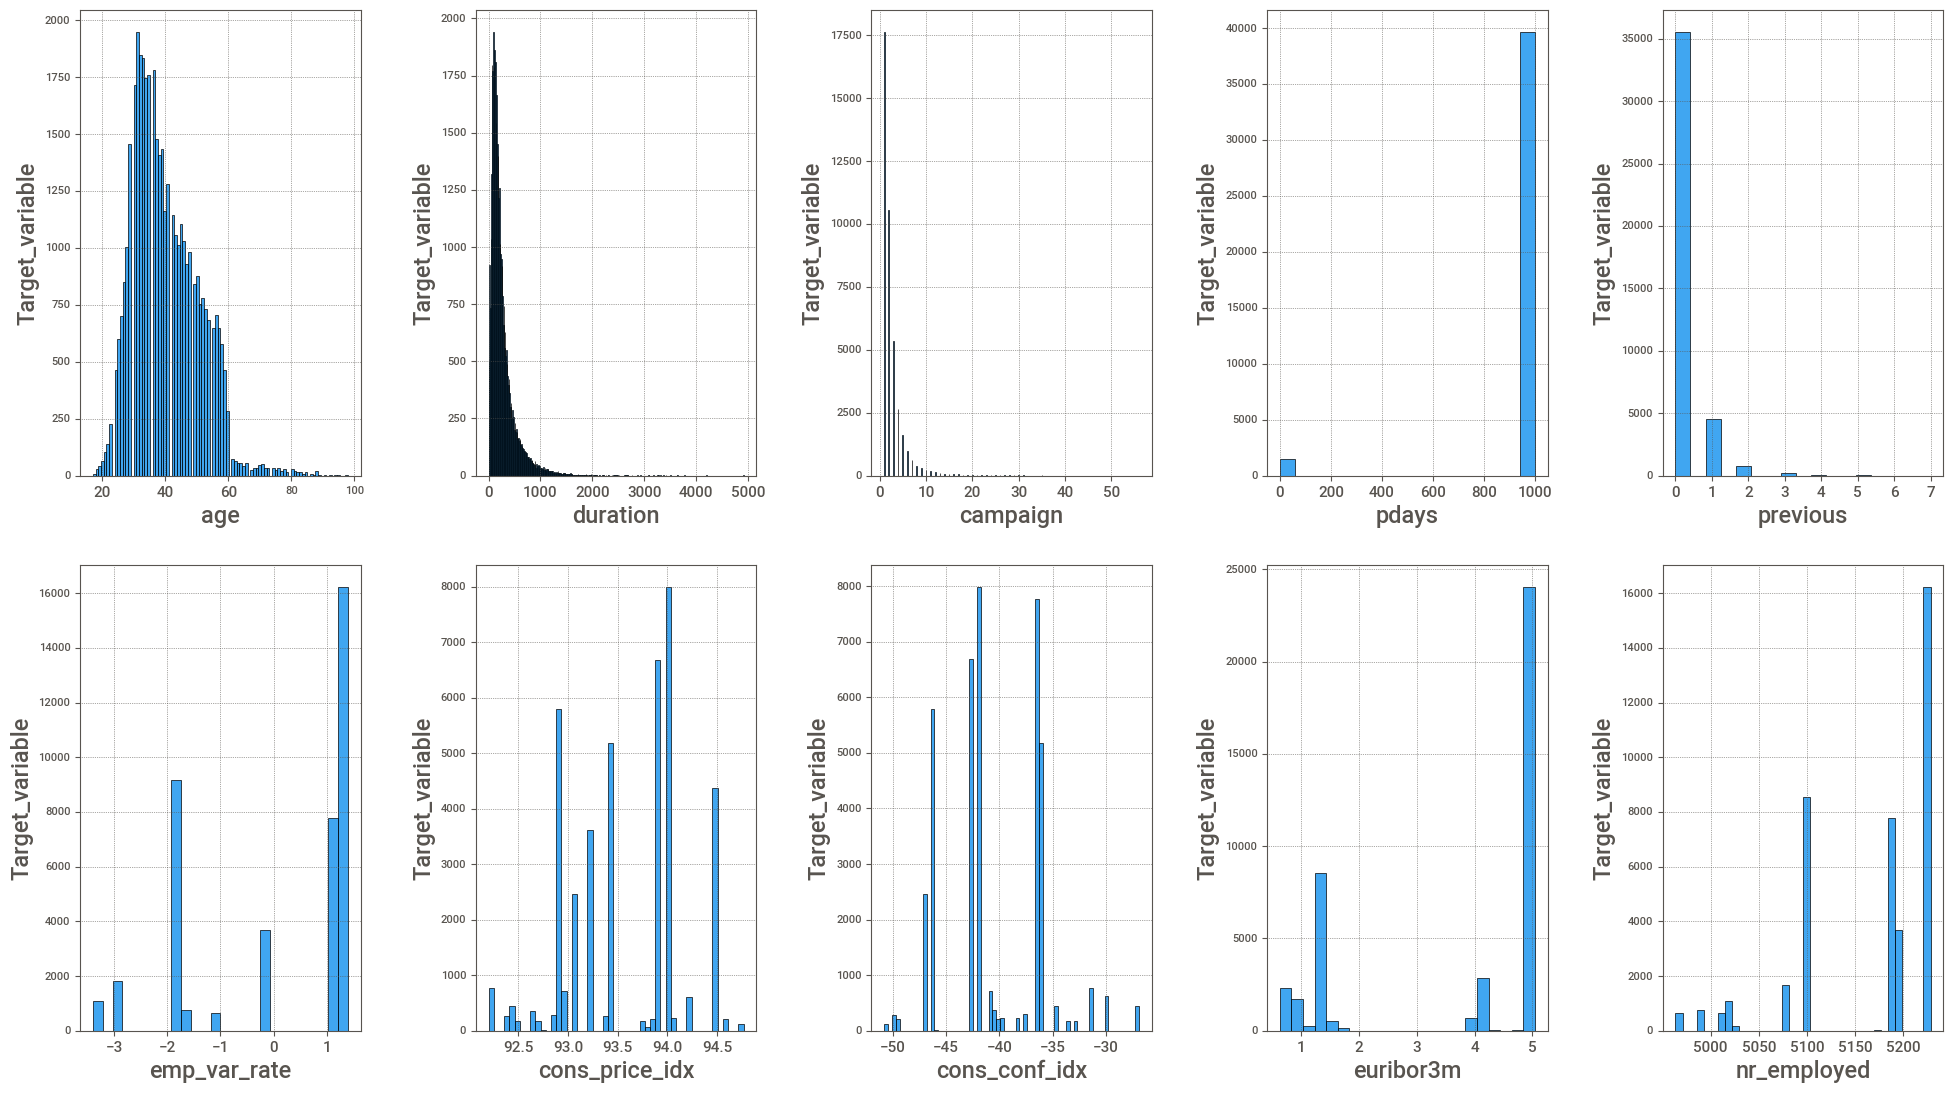

In [ ]:
plt.figure(figsize=(20, 22), facecolor='white')
plotnumber = 1
for column in data2:
  if plotnumber<=20:
    ax = plt.subplot(4,5,plotnumber)
    bar_width=0.7
    ax = plt.gca()
    for line in ax.lines:
      line.set_linewidth(0.6)
    sns.histplot(x=data2[column],ax=ax,linewidth=0.5,edgecolor='#000000')
    plt.xlabel(column, fontsize=17, ha='center')
    plt.ylabel('Target_variable', fontsize=17)
    plt.subplots_adjust(left=0.3, right=0.7, bottom=0.3, top=0.7, wspace=0.3, hspace=0.5)
    plt.xticks(rotation=0, ha='center', fontsize=11)
    plt.yticks(verticalalignment='center')
    plt.grid(True, linestyle=':', linewidth=0.5)
    plotnumber +=1
plt.tight_layout(pad=2)
plt.show()

**INSIGHTS**

*   _**Bivariate analysis** examines relationships between two variables **categorical and numerical** using visualizations with **Matplotlib** and **Seaborn** and denoted as **data1** and **data2**_

*   _These visualizations, colored by a variable **hue** which reveals trends, patterns, and potential connections between the data._

*   _To effectively visualize our data, we used **countplot** for **categorical** columns and **histplot** for numerical columns which provides a clear distinction between the data types_.


## **Multivariate analysis**

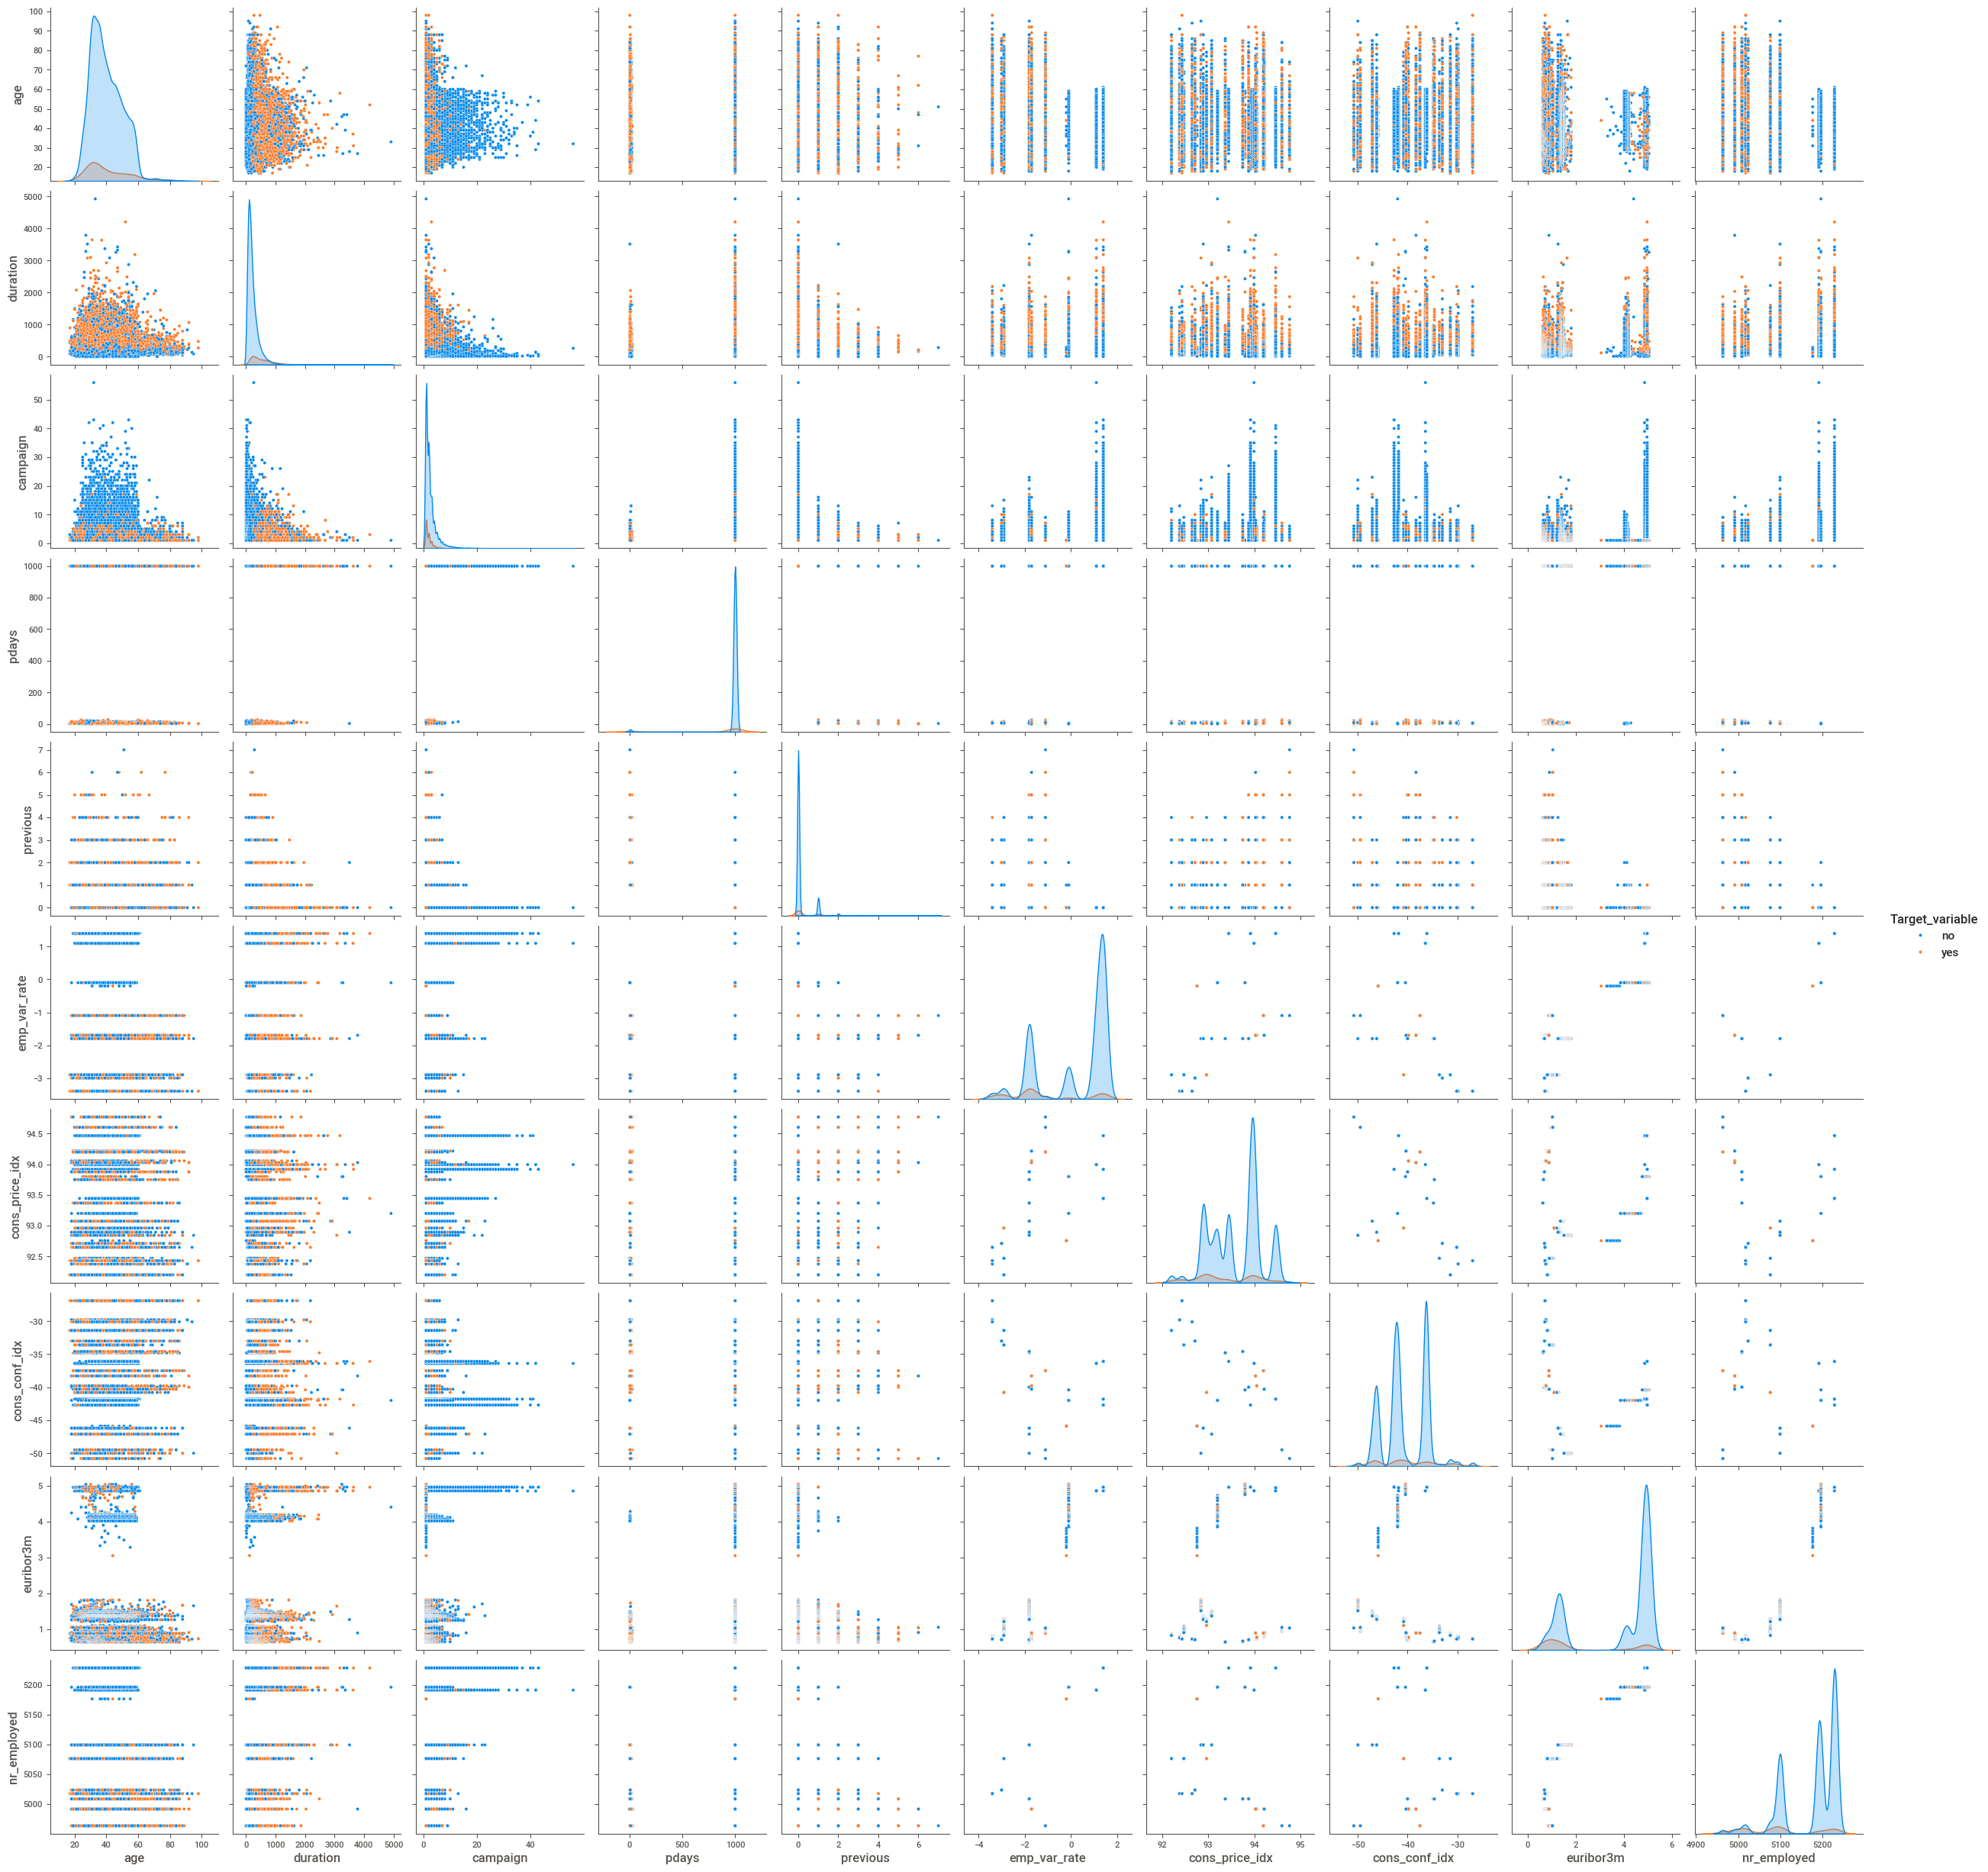

In [ ]:
sns.pairplot(data, hue='Target_variable')

**INSIGHTS**

*    _We used multivariate analysis to establish **inter-relationship** among different variables. **Multivariate analysis** provides insights into customer behavior at a deeper level, surpassing the constraints of single-variable analysis_.

*  _This empowers us to enhance prediction accuracy. In this dataset, we utilized **pairplot** for visualization_.




---


# **Data Preprocessing:**

*   _Handling Missing values_

*   _Encoding_

*   _Handling Outliers_

*   _Feature Scaling_

*   _Data Splitting_

*   _Scaling_

*   _Balancing the data_





## **Handling Missing Values**

In [13]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
Target_variable    0
dtype: int64

In [14]:
null_columns = data.columns[data.isnull().any()]
print('column in null values:',null_columns)

column in null values: Index([], dtype='object')


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
for col in null_columns:
  if pd.api.types.is_numeric_dtype(data[col]):
    data[col] = imputer.fit_transform(data[[col]])[:, 0]

for col in null_columns:
  if not pd.api.types.is_numeric_dtype(data[col]):
    data[col].fillna(data[col].mode(dropna=True).iloc[0], inplace=True)

  if data[col].isnull().sum() / len(data) > 0.5:
    data.drop(col, axis=1, inplace=True)

In [16]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
percentage_missing = (total_missing/total_cells)
print('percentage of missing overall:',percentage_missing,'%')

percentage of missing overall: 0.0 %


**INSIGHTS**

*   _**Missing values** can significantly impact the data.  They can lead to **biased results, inaccurate models**, and reduced efficiency of algorithms._

*   _We utilized the **data.columns[data.isnull().any()]** function to detect any **null values** which are in the dataset and calculated the percentage of missing data across the dataset_.

*  _Fortunately, the dataset exhibits **No missing values**._


## **Encoding**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp_var_rate     41188 non-null  float64
 16  cons_price_idx   41188 non-null  float64
 17  cons_conf_id

In [18]:
float_columns = data.select_dtypes(include='float64').columns

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
  data[col] = LE.fit_transform(data[col])
for col in float_columns:
  data[col] = LE.fit_transform(data[col])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              41188 non-null  int64
 1   job              41188 non-null  int64
 2   marital          41188 non-null  int64
 3   education        41188 non-null  int64
 4   default          41188 non-null  int64
 5   housing          41188 non-null  int64
 6   loan             41188 non-null  int64
 7   contact          41188 non-null  int64
 8   month            41188 non-null  int64
 9   day_of_week      41188 non-null  int64
 10  duration         41188 non-null  int64
 11  campaign         41188 non-null  int64
 12  pdays            41188 non-null  int64
 13  previous         41188 non-null  int64
 14  poutcome         41188 non-null  int64
 15  emp_var_rate     41188 non-null  int64
 16  cons_price_idx   41188 non-null  int64
 17  cons_conf_idx    41188 non-null  int64
 18  euribo

**INSIGHTS**

*   _By converting text and categories into a numerical language, **Encoding** unlocks the ability of **machine learning models** to **decrypt** connections between features and thereby leading to sharper predictions._

*   _We applied the **Label Encoder** technique for encoding. Utilizing label encoding within a **For Loop function**, we iterated through both the categorical and float columns, **converting** them to **int64**_.



## **Handling Outliers**

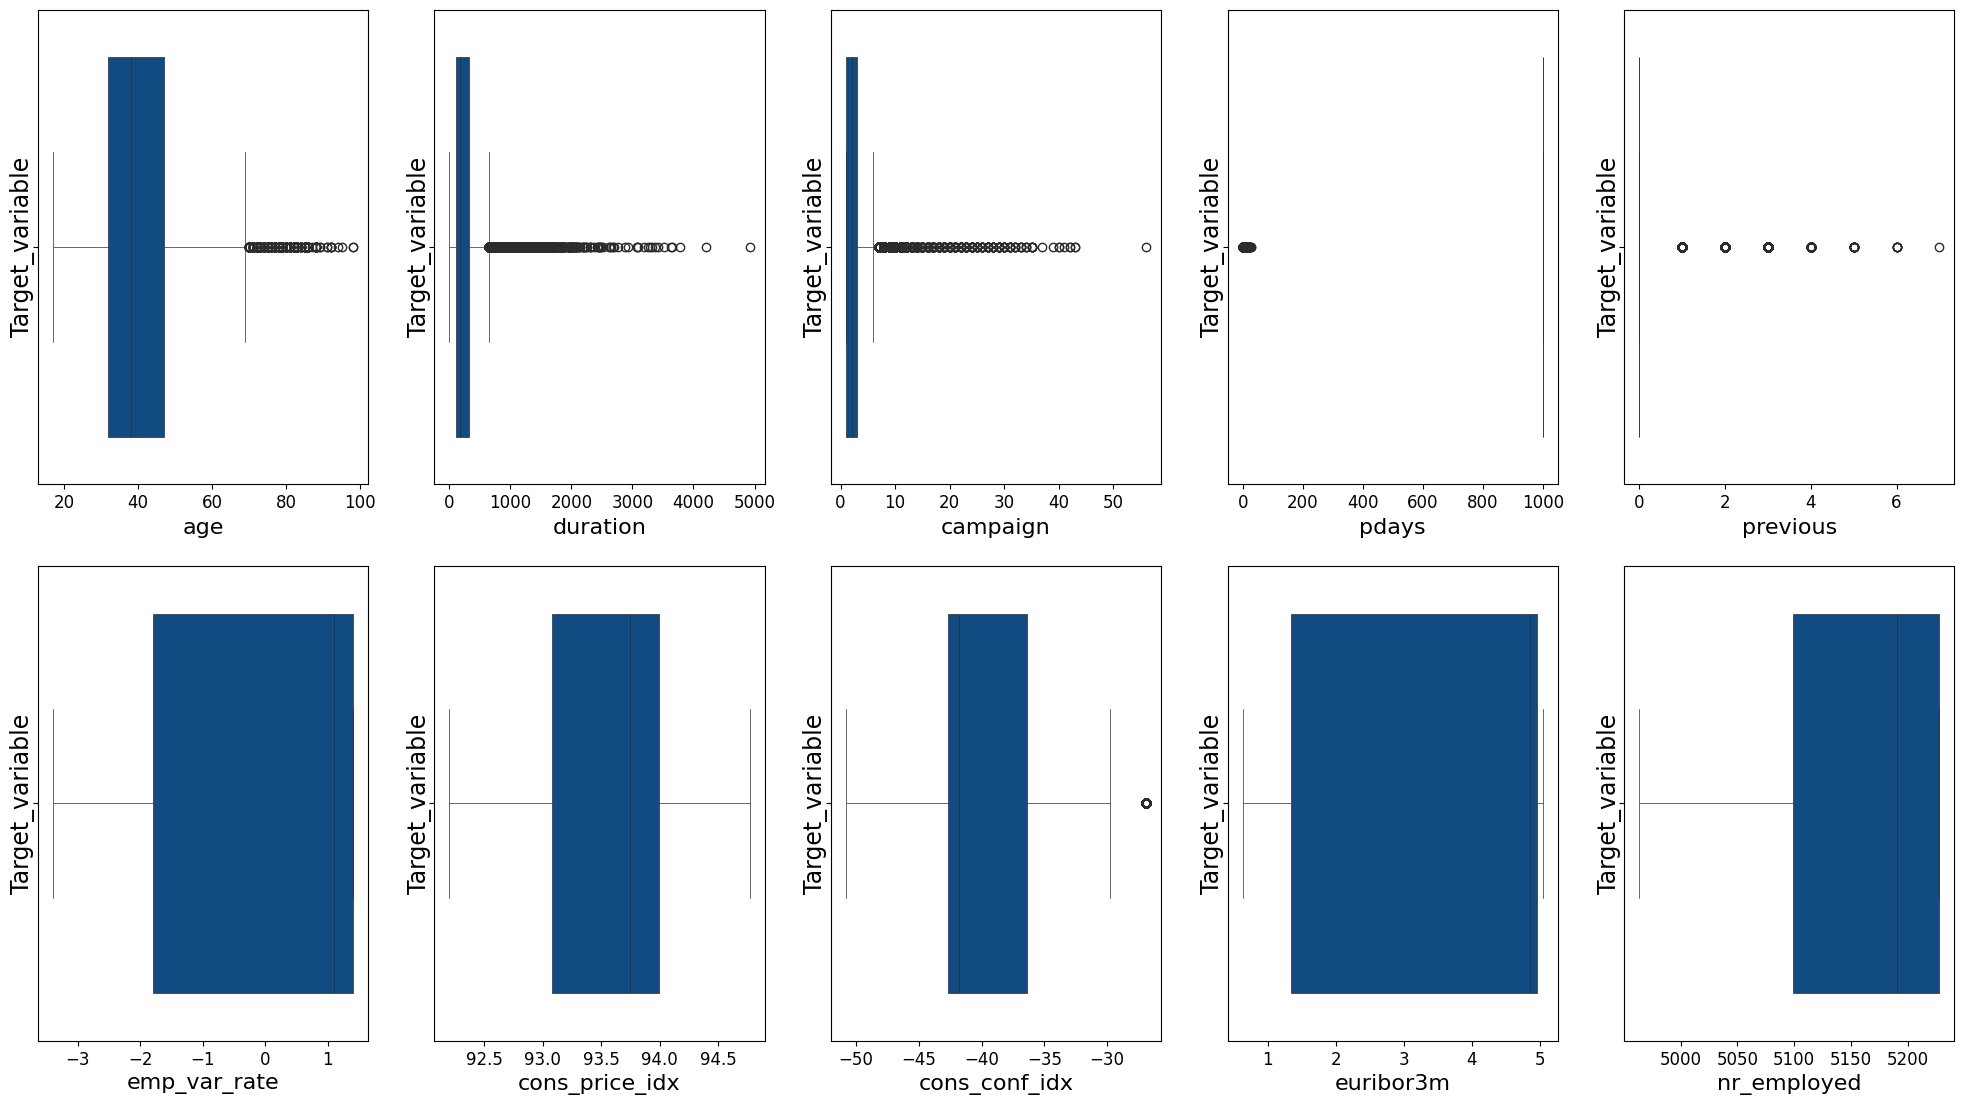

In [22]:
plt.figure(figsize=(20,22),facecolor='white')
plotnumber = 1
for column in data2:
  if plotnumber<=20:
    ax = plt.subplot(4,5,plotnumber)
    bar_width = 0.7
    ax = plt.gca()
    for line in ax.lines:
      line.set_linewidth(0.6)
    plt.subplots_adjust(left=0.15,right=0.85,top=0.9,bottom=0.15,wspace=0.3,hspace=0.4)
    plt.xticks(rotation=0,fontsize=12,ha='center')
    plt.yticks(rotation=0,fontsize=12,va='center')
    sns.boxplot(x=data2[column],linewidth=0.5,ax=ax,color='#004A94')
    plt.xlabel(column,fontsize=16,ha='center')
    plt.ylabel('Target_variable',fontsize=17,va='center')
    plotnumber +=1
plt.tight_layout(pad=2)
plt.show()

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
outliers_count = ((data<LB)|(data>UB)).sum()
outliers_percentage = (outliers_count/len(data))*100
print('\nsum of percentage:\n',outliers_percentage)


sum of percentage:
 age                 1.138681
job                 0.000000
marital             0.000000
education           0.000000
default            20.879868
housing             0.000000
loan               17.573080
contact             0.000000
month               0.000000
day_of_week         0.000000
duration            7.193843
campaign            5.841507
pdays               3.678256
previous           13.656890
poutcome           13.656890
emp_var_rate        0.000000
cons_price_idx      0.000000
cons_conf_idx       0.000000
euribor3m           4.501311
nr_employed         0.000000
Target_variable    11.265417
dtype: float64


In [22]:
outliers_column = ['age', 'duration', 'campaign', 'euribor3m']
for column in outliers_column:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    data.loc[(data[column] < LB) | (data[column] > UB), column] = np.median(data[column])

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
outliers_count = ((data<LB)|(data>UB)).sum()
outliers_percentage = (outliers_count/len(data))*100
print('\nsum of percentage:\n',outliers_percentage)


sum of percentage:
 age                 0.000000
job                 0.000000
marital             0.000000
education           0.000000
default            20.879868
housing             0.000000
loan               17.573080
contact             0.000000
month               0.000000
day_of_week         0.000000
duration            4.377489
campaign            0.000000
pdays               3.678256
previous           13.656890
poutcome           13.656890
emp_var_rate        0.000000
cons_price_idx      0.000000
cons_conf_idx       0.000000
euribor3m           0.577838
nr_employed         0.000000
Target_variable    11.265417
dtype: float64


**INSIGHTS**

*   _Outliers act as **red flags** and it can reveal **unexpected patters** or **errors** in the data that can **impact** how we analyze data and make decisions._

*   _To effectively deal with outliers, the **IQR method** steps in._

*   _It helps us to pinpoint these outliers in the data, ultimately leading to more **accurate analyses** and **prevent misleading results**._

## **Feature Selection**

<Axes: >

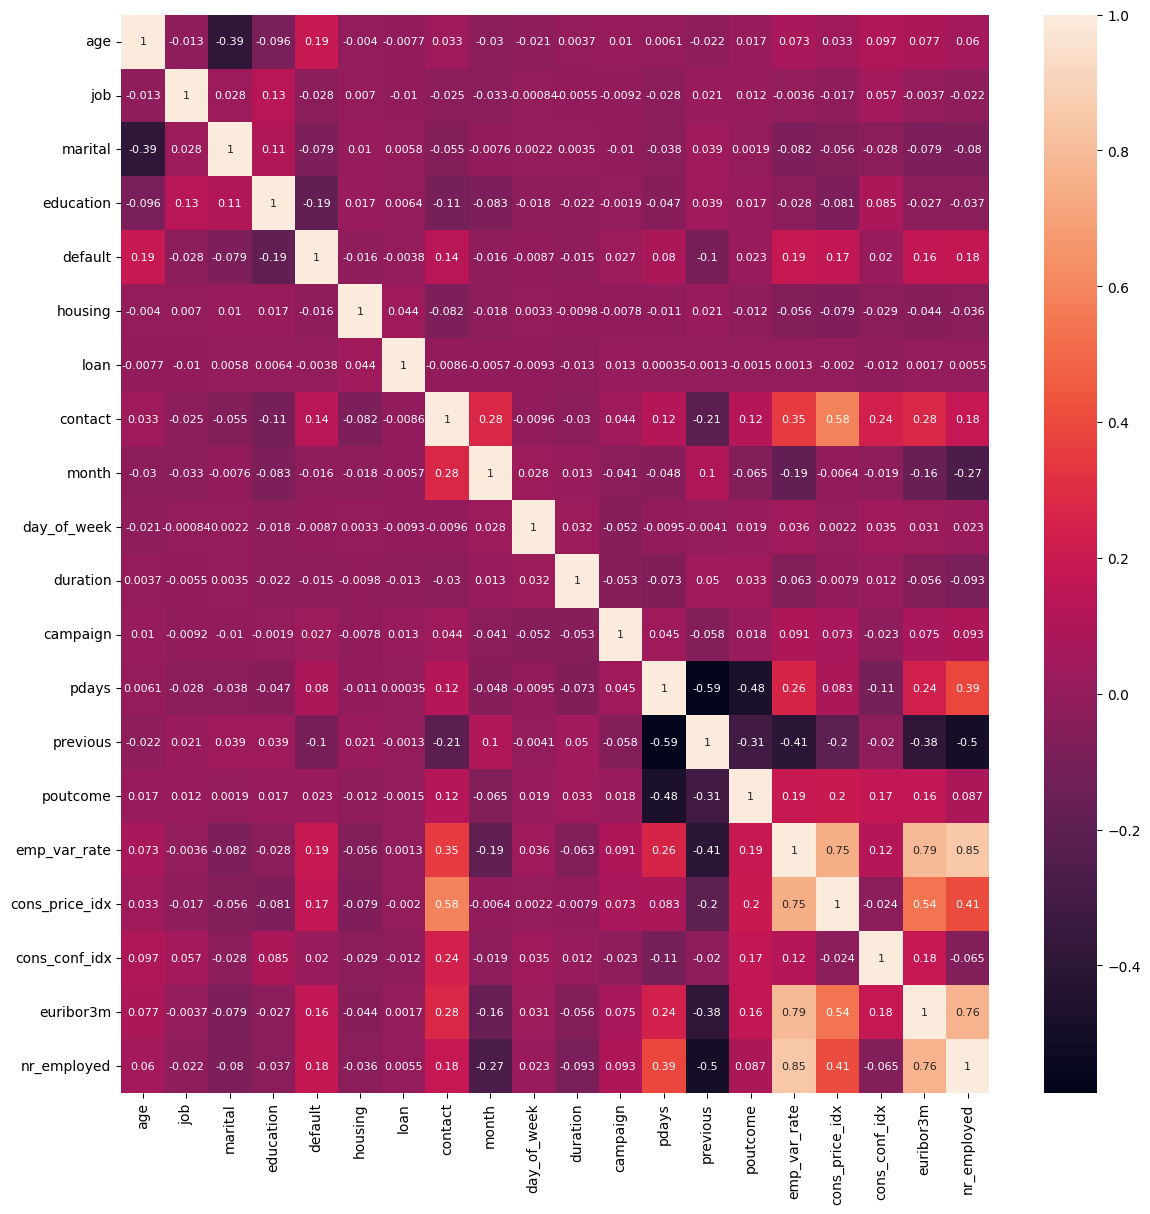

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data.drop('Target_variable',axis=1).corr(),annot=True,annot_kws= {'size':8})

**INSIGHTS**

*   _With the Help of **Feature selection** we can eliminate **irrelevant or redundant features**_.

*   _The model will focus on the information that **truly** matters for **prediction**. This can lead to more accurate and **generalizable models**, avoiding issues like **overfitting**_.

*   _To see how our features are interrelated, we used Seaborn's **heatmap** function. This will create a visual representation of **correlations** between the features in our data **excluding the target variable**_.

## **Data Splitting**

In [24]:
x = data.drop('Target_variable',axis=1)
y = data['Target_variable']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=43)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 20)
(8238, 20)
(32950,)
(8238,)


**INSIGHTS**

*  _Splitting data into **training and testing** sets helps us to avoid overfitting **(memorizing training data)** and ensures the model to perform its task hastily_.

*   _For Splitting the data we used **Train test split** from **scikit learn** library_

*   _Then we assigned a **test size** and **random state** to control the Split Ratio and reproducible Results_

## **Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 20)
(8238, 20)
(32950,)
(8238,)


**INSIGHTS**

*   _**Scaling** in machine learning prevents features with larger values from dominating calculations and ensures all features contribute **fairly**, leading to better model performance._

*   _After the use of **StandardScaler** to transform training and testing data, we converted them back into DataFrames. The two main reason for doing this is that it **preserves Column Labels** and enables further **Data Exploration**_

## **Balancing the Data**

In [30]:
y_train.value_counts()

0    29278
1     3672
Name: Target_variable, dtype: int64

In [31]:
pip install --upgrade imbalanced-learn

In [32]:
from collections import Counter

def is_imbalanced(y_train, threshold=0.2):
  class_counts = Counter(y_train)
  total_samples = len(y_train)
  minority_ratio = min(class_counts.values()) / total_samples
  return minority_ratio < threshold

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train, y_train)

if is_imbalanced(y_train):
    smote = SMOTE()
    x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)
else:
    x_train_smote = x_train_scaled
    y_train_smote = y_train

In [35]:
from collections import Counter
counter_train = Counter(y_train)
print(counter_train)
counter_smote = Counter(y_train_smote)
print(counter_smote)

Counter({0: 29278, 1: 3672})
Counter({0: 29278, 1: 29278})


In [36]:
y_train_smote.value_counts()

0    29278
1    29278
Name: Target_variable, dtype: int64

**INSIGHTS**

*   _In Imbalanced data, the model **prioritizes** the **majority class**. Balancing technique helps to **avoid** this **bias** and ensures the model performs well for both **frequent** and **rare** classes._

*   _To address the issue of imbalance, we used **SMOTE** (Synthetic Minority Over-sampling Technique). SMOTE helps us to create a more balanced dataset by generating synthetic samples for the under-represented class_.

*   _It ensures that the model learns effectively from both common and rare examples._




---


# **Model Implementation:**

*   _SVM_

*   _Random Forest_

*   _Extreme Gradient Boosting_

*   _Multi-Layer Perceptrons_



## **Support Vector Machine**

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, recall_score

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=2.0)
model_svm = svm.fit(x_train_smote,y_train_smote)

In [45]:
y_pred = svm.predict(x_test_scaled)

In [59]:
accuracy_score(y_test, y_pred)

0.9002184996358339

In [ ]:
precision_score(y_test, y_pred, average='weighted')

0.9487686035610371

In [ ]:
recall_score(y_test, y_pred)

0.6834170854271356

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      7840
           1       0.28      0.68      0.40       398

    accuracy                           0.90      8238
   macro avg       0.63      0.80      0.67      8238
weighted avg       0.95      0.90      0.92      8238



In [ ]:
confusion_matrix(y_test, y_pred)

array([[7144,  696],
       [ 126,  272]])

**INSIGHTS**

*   _SVM is a powerful tool for **classification tasks**, especially when dealing with **high-dimensional data, limited data availability**, and clear class separation potential._

*   _Here we use RBF**(Radial Basis Function)** as **kernel** and **C**-Controls the trade-off between **maximizing the margin** and **minimizing the mis-classification errors** during training._

*   _Our **SVM** model achieved a **90% accuracy rate**._



---


## **Random Forest Algorithm**

In [47]:
from sklearn.ensemble import RandomForestClassifier
RCF = RandomForestClassifier(n_estimators=100, random_state=43)
model_RCF = RCF.fit(x_train_smote,y_train_smote)

In [48]:
y_pred_RCF = RCF.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_RCF)

0.907623209516873

In [ ]:
precision_score(y_test, y_pred_RCF, average='weighted')

0.9319997191529974

In [ ]:
recall_score(y_test, y_pred_RCF)

0.6710743801652893

In [ ]:
confusion_matrix(y_test, y_pred_RCF)

array([[7071,  562],
       [ 199,  406]])

**INSIGHTS**

*   _We used a **Random Forest** model to tackle large and complex datasets and we chosen the important **parameters** to prevent the model from overfitting_

*  _We set the parameters **n_estimators** as 100 and **random state** as 43. It will control the number of weak learners that are created in the ensemble model_.

*   _**Random state** Sets a **seed** which ensures that the **same sequence** of random numbers are generated each time when we run the algorithm with the same data_

*   _After fitting the model on **x_train and y_train** and making predictions on **x_test**, we achieved an accuracy score of **90.7%.**_




---


## **Extreme Gradient Boosting**

In [51]:
unique_classes = len(np.unique(y_train))
print("Number of unique classes:", unique_classes)

Number of unique classes: 2


In [55]:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier(objective="multi:softmax", eta=0.1, max_depth=5, n_estimators=100,
                    gamma=1, min_child_weight=3, num_class=2)
model_XGB = XGB.fit(x_train_smote,y_train_smote)

In [56]:
y_pred_XGB = XGB.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_XGB)

0.9115076474872542

In [ ]:
precision_score(y_test,y_pred_XGB, average='weighted')

0.9356187574511797

In [ ]:
recall_score(y_test,y_pred_XGB)

0.6988352745424293

In [ ]:
confusion_matrix(y_test,y_pred_XGB)

array([[7089,  548],
       [ 181,  420]])

**INSIGHTS**

*   _We used **Extreme gradient boosting** because it has built-in features which avoid overfitting on training data._

*   _We applied **Unique class** function on **y_train** to identify the number of unique classes so that we can use in parameters_

*   _In parameters we used **multi softmax** for multi-class classification problems and **eta** as **0.1** to prevent large steps and to improve convergence._

*   _**n_estimators** as 100 to improve accuracy and **max_depth** as 5 to control tree complexity and **min_child_weight** as 3 to prevent overfitting by avoiding sparse trees with very few data points_.

*   _By using Extreme Gradient Boosting, we were able to achieve a high **accuracy** of **92%**._



---


## **Multi-layer Preceptrons**

In [58]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(50,3),activation="relu",alpha=0.0001,
                    max_iter=200, solver='adam',early_stopping=True)
model_MLP = MLP.fit(x_train_smote,y_train_smote)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(50,3),activation="relu",alpha=0.0001,
                    max_iter=200, solver='adam',early_stopping=True)
model_MLP = MLP.fit(x_train,y_train)

In [59]:
y_pred_MLP = MLP.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_MLP)

0.9002184996358339

In [ ]:
precision_score(y_pred_MLP, y_test, average='weighted')

0.9453054409241776

In [62]:
recall_score(y_test,y_pred_MLP)

0.7902892561983471

In [ ]:
confusion_matrix(y_pred_MLP,y_test)

array([[7162,  712],
       [ 108,  256]])

**INSIGHTS**

*   _**MLPs** address **non-linearity** and learn feature representations through hidden layers_

*   _Here the parameters which employed are **hidden_layer_sizes** as (50, 3) there are **two** hidden layers. The first layer has **50 neurons**, and the second layer has **3 neurons**._

*   _**Activation** as **relu** is the activation function for hidden layers and **alpha** as **0.0001** This sets the L2 regularization parameter to control model complexity and prevent overfitting._

*   _**Solver** as 'adam' **Adaptive Moment Estimation** is used to train the network and **early_stopping** as **True** which enables early stopping, a technique to **stop training** when validation performance **doesn't improve** for a certain number of iterations, helps us to prevent overfitting._

*   _By using **MLP**, we were able to achieve a high accuracy of **90%**_



---


# **Model Comparison:**



In [65]:
from tabulate import tabulate
metrics = {
    'SVM': {'Accuracy': 0.90, 'Precision': 0.94, 'Recall': 0.68},
    'Random Forest': {'Accuracy': 0.90, 'Precision': 0.93, 'Recall': 0.67},
    'XGBoost': {'Accuracy': 0.91, 'Precision': 0.93, 'Recall': 0.69},
    'MLP': {'Accuracy': 0.90, 'Precision': 0.94, 'Recall': 0.79}}

metrics_data = pd.DataFrame(metrics)
table_data = []
headers = ['Model', 'Accuracy', 'Precision', 'Recall']

for model, report in metrics.items():
    table_data.append([model, report['Accuracy'], report['Precision'], report['Recall']])
print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))

╒═══════════════╤════════════╤═════════════╤══════════╕
│ Model         │   Accuracy │   Precision │   Recall │
╞═══════════════╪════════════╪═════════════╪══════════╡
│ SVM           │       0.9  │        0.94 │     0.68 │
├───────────────┼────────────┼─────────────┼──────────┤
│ Random Forest │       0.9  │        0.93 │     0.67 │
├───────────────┼────────────┼─────────────┼──────────┤
│ XGBoost       │       0.91 │        0.93 │     0.69 │
├───────────────┼────────────┼─────────────┼──────────┤
│ MLP           │       0.9  │        0.94 │     0.79 │
╘═══════════════╧════════════╧═════════════╧══════════╛


 **INSIGHTS**

*   _A **model comparison report** helps us to see whether which model **performs the best**_.

*   _By analyzing the various factors and how each model weighs, we gain a deeper understanding of **decision-making** processes, ultimately allowing us to make more **strategic choices**._

*   _Based on our model comparison, **Extreme Gradient Boosting** appears to be the **most promising model**_.

*   _It achieved an **accuracy of 92%** and a **precision of 94%**, indicating strong overall performance and a high rate of true positive predictions._



---


# **Challenges Faced:**


**1**.  **Importing the Data:**

*  _Since the **raw excel file** sheet columns are **merged** together into a **single column**, we founded it difficult to read and analyse the file. Ultimately, we found bit hard to segregate the columns. so we used **delimit function** in excel to separate rows and columns in the dataset and it is perfectly readable._

**2**.  **Data Preprocessing:**

*   _**Outlier Detection**: Choosing the Right Technique is challenging one and there are Different methods (z-scores, IQR, isolation forests) have varying sensitivities. Selecting the most appropriate one depends on the data distribution so we selected **IQR method** to handle the outliers_.

*   _**Computational Resources**: Training and testing the models on a large dataset requires powerful computing resources and optimization techniques so we used **Data splitting** and employed **Standard scaler** for scaling the data_

*   _**Class Imbalance**: The target variable ("y") is imbalanced (more "no" than "yes" subscriptions) This can lead to **models biased** towards the majority class. We addressed this with **SMOTE** technique Replicating data points from the **minority class** to achieve a more balanced distribution._

**3**.   **Model Training and Evaluation**:

*   _**Model Selection and Interpretation**: Choosing the best model and understanding its predictions can be challenging With various algorithms available, selecting the most suitable one requires careful consideration. We explored **four strong algorithms** for this dataset._



---


# **Suggestions:**

_Putting our model's recommendations into action will empower the bank to:_

*   _**Fine-tune their term deposit marketing campaigns**: Leverage the model's insights to optimize campaign strategies._

*   _**Boost customer engagement**: By tailoring their approach, the bank can create more relevant and engaging experiences for their customers._

*   _**Ultimately achieve stronger outcomes**: This combination of optimization and engagement translates to improved results for the bank_.



---


# **Conclusion:**

*   _While analyzing the **Portuguese bank dataset** presented hurdles, a systematic approach overcame these challenges. Careful **data preparation**, thoughtful **model selection**, and addressing class imbalance were crucial._

*   _This resulted in **valuable insights** that can optimize marketing strategies, enhance campaign effectiveness, and uphold ethical considerations and information._



---

